# Importing required packages

In [2]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [1148]:
pip install uszipcode

Note: you may need to restart the kernel to use updated packages.


In [4]:
import uszipcode as uszipcode
from uszipcode import SearchEngine

search = SearchEngine(simple_zipcode=True)

# Importing and understanding the dataset

In [5]:
df = pd.read_csv('/Users/KrithikaSrinivasan/Downloads/Loan_Modelling.csv')
np.random.seed(1)
df.head()

ID  Age  Experience  Income  ZIPCode  Family  CCAvg  Education  Mortgage  \
0   1   25           1      49    91107       4    1.6          1         0   
1   2   45          19      34    90089       3    1.5          1         0   
2   3   39          15      11    94720       1    1.0          1         0   
3   4   35           9     100    94112       1    2.7          2         0   
4   5   35           8      45    91330       4    1.0          2         0   

   Personal_Loan  Securities_Account  CD_Account  Online  CreditCard  
0              0                   1           0       0           0  
1              0                   1           0       0           0  
2              0                   0           0       0           0  
3              0                   0           0       0           0  
4              0                   0           0       0           1

In [6]:
# creating a copy of the dataset
df_copy = df.copy()
df_copy.head()

ID  Age  Experience  Income  ZIPCode  Family  CCAvg  Education  Mortgage  \
0   1   25           1      49    91107       4    1.6          1         0   
1   2   45          19      34    90089       3    1.5          1         0   
2   3   39          15      11    94720       1    1.0          1         0   
3   4   35           9     100    94112       1    2.7          2         0   
4   5   35           8      45    91330       4    1.0          2         0   

   Personal_Loan  Securities_Account  CD_Account  Online  CreditCard  
0              0                   1           0       0           0  
1              0                   1           0       0           0  
2              0                   0           0       0           0  
3              0                   0           0       0           0  
4              0                   0           0       0           1

In [7]:
# shape of the dataset
print(f'The dataset has {df.shape[0]} rows and {df.shape[1]} columns')

The dataset has 5000 rows and 14 columns


In [8]:
# check for null values
df.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIPCode               0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal_Loan         0
Securities_Account    0
CD_Account            0
Online                0
CreditCard            0
dtype: int64

In [9]:
# checking for duplicate rows
df[df.duplicated()].count()

ID                    0
Age                   0
Experience            0
Income                0
ZIPCode               0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal_Loan         0
Securities_Account    0
CD_Account            0
Online                0
CreditCard            0
dtype: int64

There are no missing values or duplicate rows in the dataset

In [10]:
df.dtypes

ID                      int64
Age                     int64
Experience              int64
Income                  int64
ZIPCode                 int64
Family                  int64
CCAvg                 float64
Education               int64
Mortgage                int64
Personal_Loan           int64
Securities_Account      int64
CD_Account              int64
Online                  int64
CreditCard              int64
dtype: object

In [11]:
df.describe().T

count          mean          std      min       25%  \
ID                  5000.0   2500.500000  1443.520003      1.0   1250.75   
Age                 5000.0     45.338400    11.463166     23.0     35.00   
Experience          5000.0     20.104600    11.467954     -3.0     10.00   
Income              5000.0     73.774200    46.033729      8.0     39.00   
ZIPCode             5000.0  93169.257000  1759.455086  90005.0  91911.00   
Family              5000.0      2.396400     1.147663      1.0      1.00   
CCAvg               5000.0      1.937938     1.747659      0.0      0.70   
Education           5000.0      1.881000     0.839869      1.0      1.00   
Mortgage            5000.0     56.498800   101.713802      0.0      0.00   
Personal_Loan       5000.0      0.096000     0.294621      0.0      0.00   
Securities_Account  5000.0      0.104400     0.305809      0.0      0.00   
CD_Account          5000.0      0.060400     0.238250      0.0      0.00   
Online              5000.0      0.596800     0.490589      0.0      0.00   
CreditCard          5000.0      0.294000     0.455637      0.0      0.00   

                        50%       75%      max  
ID                   2500.5   3750.25   5000.0  
Age                    45.0     55.00     67.0  
Experience             20.0     30.00     43.0  
Income                 64.0     98.00    224.0  
ZIPCode             93437.0  94608.00  96651.0  
Family                  2.0      3.00      4.0  
CCAvg                   1.5      2.50     10.0  
Education               2.0      3.00      3.0  
Mortgage                0.0    101.00    635.0  
Personal_Loan           0.0      0.00      1.0  
Securities_Account      0.0      0.00      1.0  
CD_Account              0.0      0.00      1.0  
Online                  1.0      1.00      1.0  
CreditCard              0.0      1.00      1.0

ID column- customer ID so looks like this column will not be a significant factor in prediction <br>
Age- minimum age is 23 and average age of a customer is 45 <br>
Experience- minimum experience is -3- this looks like an error so this column needs pre-proceesing (replace with absolute value) <br>
Income- minimum income of 8K looks very low- this column needs pre-processing <br>
ZIPCode- this can be used to figure out the location, column looks ok <br>
Family- minimum of 1 could mean the customer is single, column looks ok <br>
CCAvg- minimum of 0 could mean the customer does not have or use their credit card, column looks ok <br>
Education- 1: did not complete a college degree, 2: completed a college degree, 3: completed a professional degree, column looks ok <br>
Mortgage- average mortgage is 56K, column looks ok <br>




# Exploratory Data Analysis

# Univariate Analysis

# Age

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


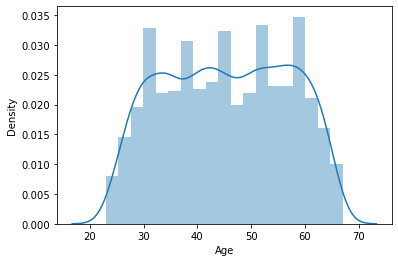

In [12]:
sns.distplot(df['Age']);

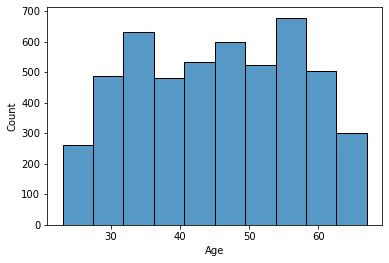

In [13]:
sns.histplot(df['Age'], bins=10);

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


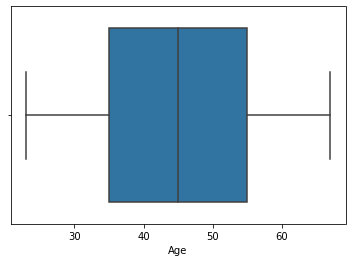

In [14]:
sns.boxplot(df['Age']);
# no outliers in this column

# Experience

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


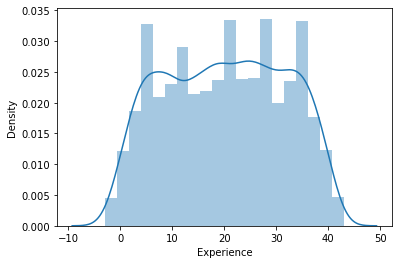

In [15]:
sns.distplot(df['Experience']);

In [16]:
df[df['Experience'] < 0].shape[0]
# 52 negative values in this column- needs to be converted to absolute values in the pre-processing step

52

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


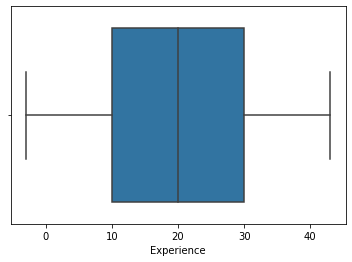

In [17]:
sns.boxplot(df['Experience']);

# Income

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


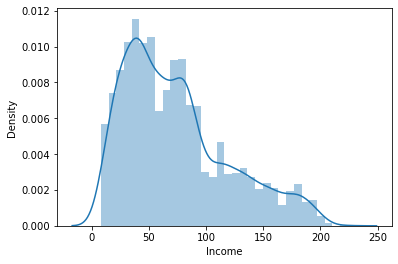

In [18]:
sns.distplot(df['Income']);
# this column is skewed to the right- need to remove skewness in the pre-processing step

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


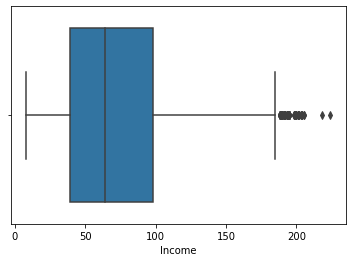

In [19]:
sns.boxplot(df['Income']);

In [20]:
df[df['Income'] > 200]
# 16 customers have income greater than 200K
# Looks like these are outliers that do not need to be dropped from the dataset

ID  Age  Experience  Income  ZIPCode  Family  CCAvg  Education  \
526    527   26           2     205    93106       1   6.33          1   
677    678   46          21     204    92780       2   2.80          1   
787    788   45          15     202    91380       3  10.00          3   
1711  1712   27           3     201    95819       1   6.33          1   
1901  1902   43          19     201    94305       2   6.67          1   
2101  2102   35           5     203    95032       1  10.00          3   
2278  2279   30           4     204    91107       2   4.50          1   
2337  2338   43          16     201    95054       1  10.00          2   
2447  2448   44          19     201    95819       2   8.80          1   
2988  2989   46          21     205    95762       2   8.80          1   
3608  3609   59          35     202    94025       1   4.70          1   
3804  3805   47          22     203    95842       2   8.80          1   
3896  3897   48          24     224    93940       2   6.67          1   
4225  4226   43          18     204    91902       2   8.80          1   
4895  4896   45          20     201    92120       2   2.80          1   
4993  4994   45          21     218    91801       2   6.67          1   

      Mortgage  Personal_Loan  Securities_Account  CD_Account  Online  \
526        271              0                   0           0       0   
677          0              0                   0           0       1   
787          0              1                   0           0       0   
1711       158              0                   0           0       1   
1901         0              0                   1           0       1   
2101         0              1                   0           0       0   
2278         0              0                   0           0       1   
2337         0              1                   0           0       0   
2447         0              0                   0           0       1   
2988       181              0                   1           0       1   
3608       553              0                   0           0       0   
3804         0              0                   0           0       1   
3896         0              0                   0           1       1   
4225         0              0                   0           0       1   
4895         0              0                   0           0       1   
4993         0              0                   0           0       1   

      CreditCard  
526            1  
677            0  
787            0  
1711           0  
1901           0  
2101           0  
2278           0  
2337           1  
2447           1  
2988           0  
3608           0  
3804           0  
3896           1  
4225           0  
4895           1  
4993           0

# Family

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


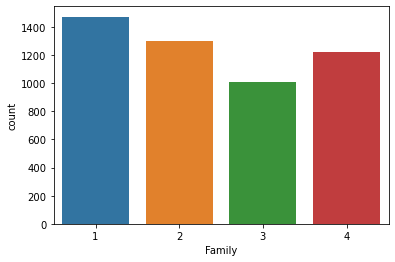

In [21]:
sns.countplot(df['Family']);
# Single customers are the most followed by a family of size 2

In [22]:
df['ID'].groupby(df['Family']).count()
print("Family Size 1= ", df['ID'].groupby(df['Family']).count()[1]/len(df))
print("Family Size 2= ", df['ID'].groupby(df['Family']).count()[2]/len(df))
print("Family Size 3= ", df['ID'].groupby(df['Family']).count()[3]/len(df))
print("Family Size 4= ", df['ID'].groupby(df['Family']).count()[4]/len(df))

Family Size 1=  0.2944
Family Size 2=  0.2592
Family Size 3=  0.202
Family Size 4=  0.2444


# CCAvg

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


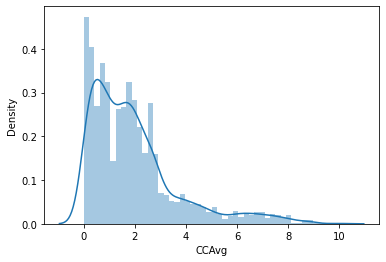

In [23]:
sns.distplot(df['CCAvg']);
# this column is skewed to the right- need to remove skewness in the pre-processing step

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


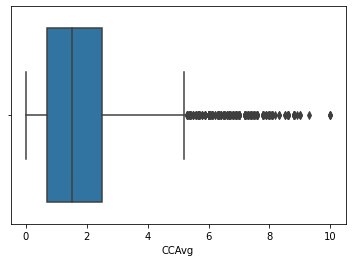

In [24]:
sns.boxplot(df['CCAvg']);

In [25]:
df[df['CCAvg'] > 6]
# 241 customers spend more than $6K on average per month
# Looks like these are outliers that do not need to be dropped from the dataset

ID  Age  Experience  Income  ZIPCode  Family  CCAvg  Education  \
9       10   34           9     180    93023       1   8.90          3   
18      19   46          21     193    91604       2   8.10          3   
55      56   41          17     139    94022       2   8.00          1   
131    132   58          34     149    93720       4   7.20          2   
145    146   59          35     124    90007       1   7.40          1   
...    ...  ...         ...     ...      ...     ...    ...        ...   
4859  4860   34           8     165    91107       1   7.00          3   
4908  4909   40          16     138    92121       2   6.10          1   
4911  4912   46          22     153    94539       2   7.50          1   
4937  4938   33           8     162    94960       1   8.60          1   
4993  4994   45          21     218    91801       2   6.67          1   

      Mortgage  Personal_Loan  Securities_Account  CD_Account  Online  \
9            0              1                   0           0       0   
18           0              1                   0           0       0   
55           0              0                   0           0       1   
131          0              1                   0           1       1   
145          0              0                   0           0       0   
...        ...            ...                 ...         ...     ...   
4859       541              1                   0           0       0   
4908         0              0                   0           0       1   
4911         0              0                   0           0       0   
4937         0              0                   0           1       1   
4993         0              0                   0           0       1   

      CreditCard  
9              0  
18             0  
55             0  
131            1  
145            1  
...          ...  
4859           0  
4908           0  
4911           0  
4937           1  
4993           0  

[241 rows x 14 columns]

# Education

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


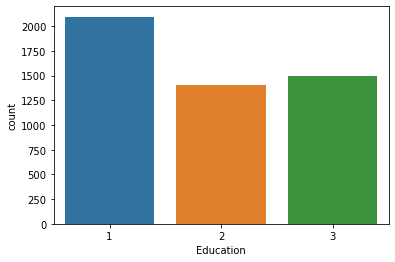

In [26]:
sns.countplot(df['Education']);
# A large number of customers are those who did not finish an undergraduate degree

In [27]:
print('Education Level 1=', df['ID'].groupby(df['Education']).count()[1]/len(df))
print('Education Level 2=', df['ID'].groupby(df['Education']).count()[2]/len(df))
print('Education Level 3=', df['ID'].groupby(df['Education']).count()[3]/len(df))

Education Level 1= 0.4192
Education Level 2= 0.2806
Education Level 3= 0.3002


# Mortgage

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


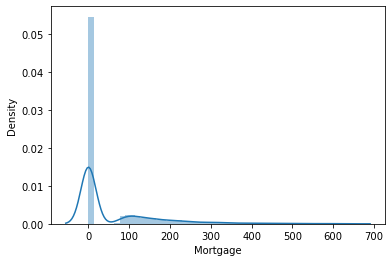

In [28]:
sns.distplot(df['Mortgage']);
# Highly skewed column- need to be pre-processed
# Could be converted to if a customer has a mortgage or no

In [29]:
df[df['Mortgage']==0]

ID  Age  Experience  Income  ZIPCode  Family  CCAvg  Education  \
0        1   25           1      49    91107       4    1.6          1   
1        2   45          19      34    90089       3    1.5          1   
2        3   39          15      11    94720       1    1.0          1   
3        4   35           9     100    94112       1    2.7          2   
4        5   35           8      45    91330       4    1.0          2   
...    ...  ...         ...     ...      ...     ...    ...        ...   
4994  4995   64          40      75    94588       3    2.0          3   
4995  4996   29           3      40    92697       1    1.9          3   
4997  4998   63          39      24    93023       2    0.3          3   
4998  4999   65          40      49    90034       3    0.5          2   
4999  5000   28           4      83    92612       3    0.8          1   

      Mortgage  Personal_Loan  Securities_Account  CD_Account  Online  \
0            0              0                   1           0       0   
1            0              0                   1           0       0   
2            0              0                   0           0       0   
3            0              0                   0           0       0   
4            0              0                   0           0       0   
...        ...            ...                 ...         ...     ...   
4994         0              0                   0           0       1   
4995         0              0                   0           0       1   
4997         0              0                   0           0       0   
4998         0              0                   0           0       1   
4999         0              0                   0           0       1   

      CreditCard  
0              0  
1              0  
2              0  
3              0  
4              1  
...          ...  
4994           0  
4995           0  
4997           0  
4998           0  
4999           1  

[3462 rows x 14 columns]

# Personal_Loan

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


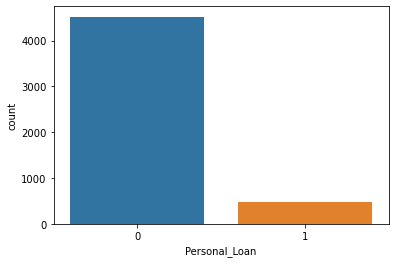

In [30]:
sns.countplot(df['Personal_Loan']);
# Most customers did not take the personal loan

In [31]:
print('No personal loan=', len(df[df['Personal_Loan'] == 0])/len(df))

No personal loan= 0.904


In [32]:
pct = df[df['Personal_Loan'] == 1].shape[0]/df.shape[0]
print(f'Percent of customers who took a personal loan is {pct*100} %')


Percent of customers who took a personal loan is 9.6 %


# Securities_Account

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


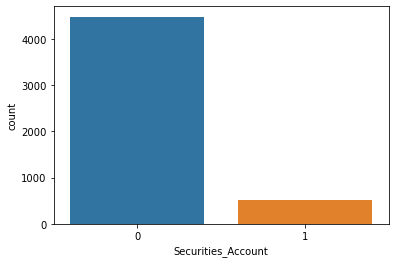

In [33]:
sns.countplot(df['Securities_Account']);
# Most customers do not have a securites account

In [34]:
print('No securities account=', len(df[df['Securities_Account']==0])/len(df))

No securities account= 0.8956


# CD_Account

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


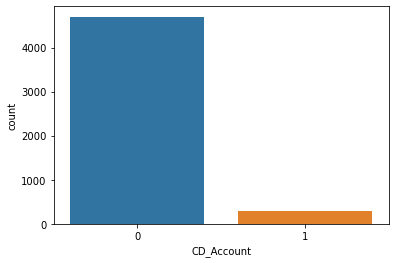

In [35]:
sns.countplot(df['CD_Account']);
# Most customers do not have a CD account

In [36]:
print('No cd account=', len(df[df['CD_Account']==0])/len(df))

No cd account= 0.9396


# Online

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


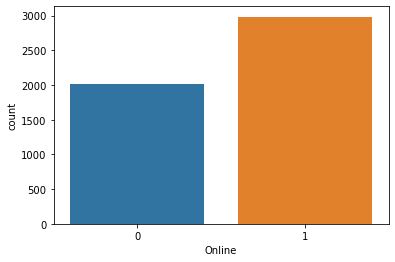

In [37]:
sns.countplot(df['Online']);
# 3000 customers have an online presence and 2000 customers do not

# CreditCard

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


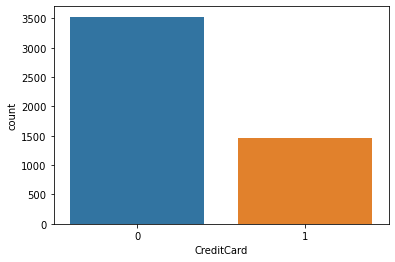

In [38]:
sns.countplot(df['CreditCard']);
# 1500 customers have a credit card with another bank and 3500 customers do not have a credit card with another bank

# Bivariate Analysis

In [39]:
df.head()

ID  Age  Experience  Income  ZIPCode  Family  CCAvg  Education  Mortgage  \
0   1   25           1      49    91107       4    1.6          1         0   
1   2   45          19      34    90089       3    1.5          1         0   
2   3   39          15      11    94720       1    1.0          1         0   
3   4   35           9     100    94112       1    2.7          2         0   
4   5   35           8      45    91330       4    1.0          2         0   

   Personal_Loan  Securities_Account  CD_Account  Online  CreditCard  
0              0                   1           0       0           0  
1              0                   1           0       0           0  
2              0                   0           0       0           0  
3              0                   0           0       0           0  
4              0                   0           0       0           1

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


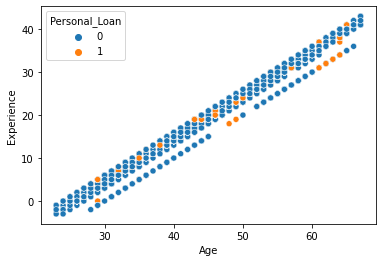

In [40]:
sns.scatterplot(df['Age'], df['Experience'], hue= df['Personal_Loan']);
# high correlation betweek Age and Experience

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


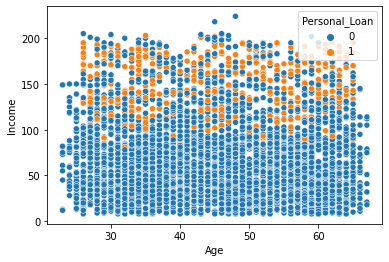

In [41]:
sns.scatterplot(df['Age'], df['Income'], hue= df['Personal_Loan']);
# No clear relationship between Age and Income

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


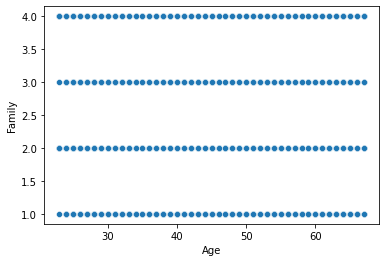

In [42]:
sns.scatterplot(df['Age'], df['Family']);
# No clear relationship between Age and Family

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


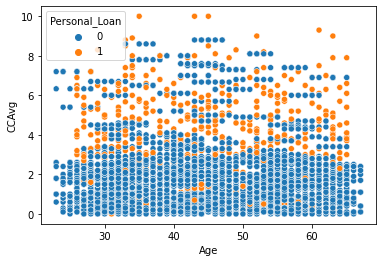

In [43]:
sns.scatterplot(df['Age'], df['CCAvg'], hue= df['Personal_Loan']);
# No clear relationship between Age and CCAvg
# Looks like those who have a higher CCAvg have taken the personal loan

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


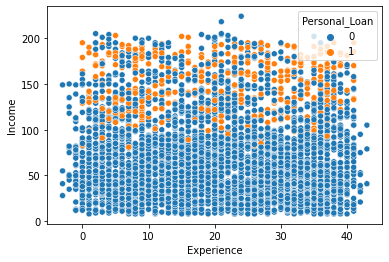

In [44]:
sns.scatterplot(df['Experience'], df['Income'], hue=df['Personal_Loan']);
# Looks like those who have a higher Income have taken the personal loan

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


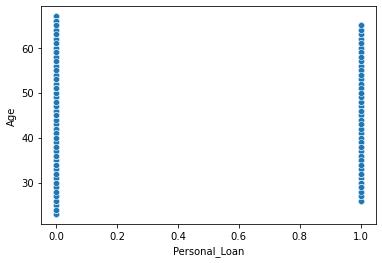

In [45]:
sns.scatterplot(df['Personal_Loan'], df['Age']);

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


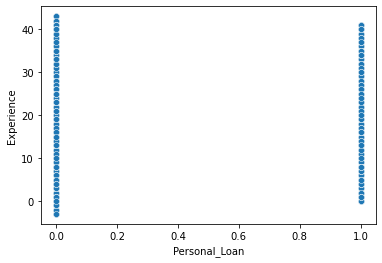

In [46]:
sns.scatterplot(df['Personal_Loan'], df['Experience']);

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


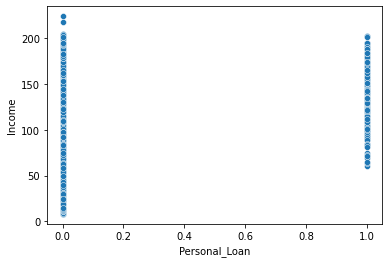

In [47]:
sns.scatterplot(df['Personal_Loan'], df['Income']);

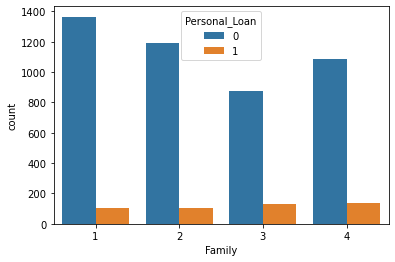

In [48]:
sns.countplot(x="Family", data=df,hue="Personal_Loan");

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


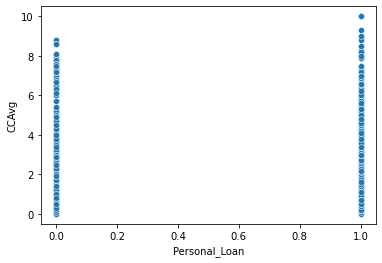

In [49]:
sns.scatterplot(df['Personal_Loan'], df['CCAvg']);

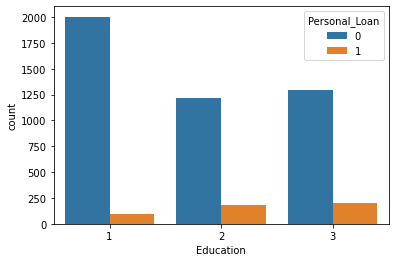

In [50]:
sns.countplot(x="Education", data=df,hue="Personal_Loan");

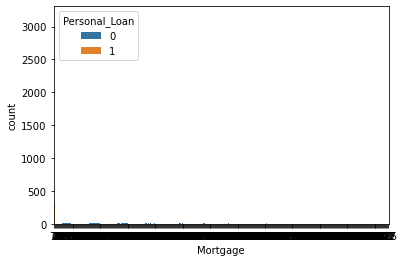

In [51]:
sns.countplot(x="Mortgage", data=df,hue="Personal_Loan");

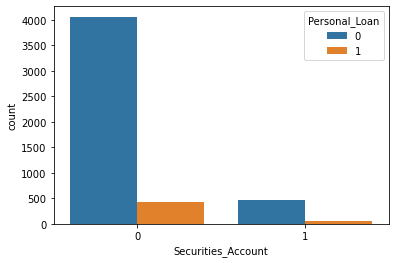

In [52]:
sns.countplot(x="Securities_Account", data=df,hue="Personal_Loan");
# Customers who dont have a securities account mostly do not have a personal loan
# A small percentage of customers who have securities accounts have a personal loan

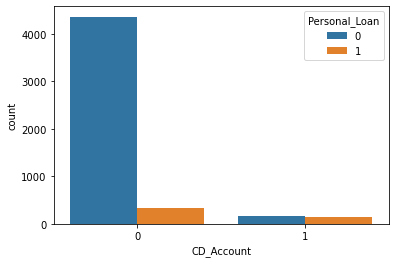

In [53]:
sns.countplot(x="CD_Account", data=df,hue="Personal_Loan");
# Most customers who have a CD account also have a personal loan

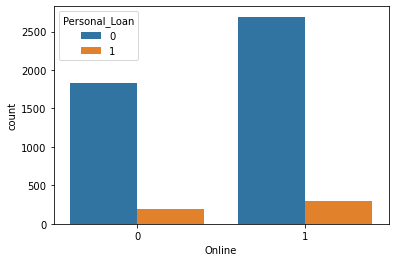

In [54]:
sns.countplot(x="Online", data=df,hue="Personal_Loan");


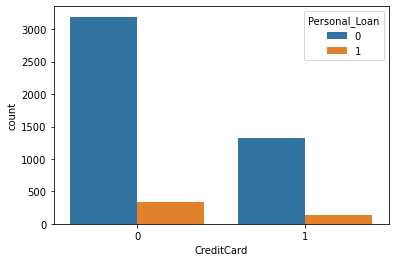

In [55]:
sns.countplot(x="CreditCard", data=df,hue="Personal_Loan");

# Multivariate Analysis

In [56]:
df.head()

ID  Age  Experience  Income  ZIPCode  Family  CCAvg  Education  Mortgage  \
0   1   25           1      49    91107       4    1.6          1         0   
1   2   45          19      34    90089       3    1.5          1         0   
2   3   39          15      11    94720       1    1.0          1         0   
3   4   35           9     100    94112       1    2.7          2         0   
4   5   35           8      45    91330       4    1.0          2         0   

   Personal_Loan  Securities_Account  CD_Account  Online  CreditCard  
0              0                   1           0       0           0  
1              0                   1           0       0           0  
2              0                   0           0       0           0  
3              0                   0           0       0           0  
4              0                   0           0       0           1

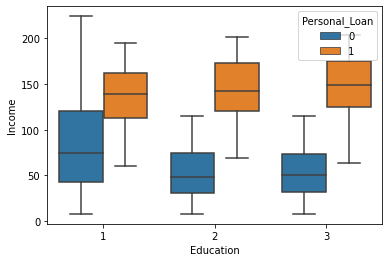

In [57]:
sns.boxplot(x='Education',y='Income',hue='Personal_Loan',data=df);
# Customers who have Education level 1 have higher income

In [58]:
df['Income'].groupby(df['Education']).mean()
# Average income for customers with Education level 1 is $85K

Education
1    85.586355
2    64.313614
3    66.122585
Name: Income, dtype: float64

In [59]:
df.corr()
# Age and Experience have very high correlation ~1 (Multicollinearity)
# CCAvg and Income have fairly high correlation ~0.6

ID       Age  Experience    Income   ZIPCode  \
ID                  1.000000 -0.008473   -0.008326 -0.017695  0.002240   
Age                -0.008473  1.000000    0.994215 -0.055269 -0.030530   
Experience         -0.008326  0.994215    1.000000 -0.046574 -0.030456   
Income             -0.017695 -0.055269   -0.046574  1.000000 -0.030709   
ZIPCode             0.002240 -0.030530   -0.030456 -0.030709  1.000000   
Family             -0.016797 -0.046418   -0.052563 -0.157501  0.027512   
CCAvg              -0.024675 -0.052012   -0.050077  0.645984 -0.012188   
Education           0.021463  0.041334    0.013152 -0.187524 -0.008266   
Mortgage           -0.013920 -0.012539   -0.010582  0.206806  0.003614   
Personal_Loan      -0.024801 -0.007726   -0.007413  0.502462 -0.002974   
Securities_Account -0.016972 -0.000436   -0.001232 -0.002616  0.002422   
CD_Account         -0.006909  0.008043    0.010353  0.169738  0.021671   
Online             -0.002528  0.013702    0.013898  0.014206  0.028317   
CreditCard          0.017028  0.007681    0.008967 -0.002385  0.024033   

                      Family     CCAvg  Education  Mortgage  Personal_Loan  \
ID                 -0.016797 -0.024675   0.021463 -0.013920      -0.024801   
Age                -0.046418 -0.052012   0.041334 -0.012539      -0.007726   
Experience         -0.052563 -0.050077   0.013152 -0.010582      -0.007413   
Income             -0.157501  0.645984  -0.187524  0.206806       0.502462   
ZIPCode             0.027512 -0.012188  -0.008266  0.003614      -0.002974   
Family              1.000000 -0.109275   0.064929 -0.020445       0.061367   
CCAvg              -0.109275  1.000000  -0.136124  0.109905       0.366889   
Education           0.064929 -0.136124   1.000000 -0.033327       0.136722   
Mortgage           -0.020445  0.109905  -0.033327  1.000000       0.142095   
Personal_Loan       0.061367  0.366889   0.136722  0.142095       1.000000   
Securities_Account  0.019994  0.015086  -0.010812 -0.005411       0.021954   
CD_Account          0.014110  0.136534   0.013934  0.089311       0.316355   
Online              0.010354 -0.003611  -0.015004 -0.005995       0.006278   
CreditCard          0.011588 -0.006689  -0.011014 -0.007231       0.002802   

                    Securities_Account  CD_Account    Online  CreditCard  
ID                           -0.016972   -0.006909 -0.002528    0.017028  
Age                          -0.000436    0.008043  0.013702    0.007681  
Experience                   -0.001232    0.010353  0.013898    0.008967  
Income                       -0.002616    0.169738  0.014206   -0.002385  
ZIPCode                       0.002422    0.021671  0.028317    0.024033  
Family                        0.019994    0.014110  0.010354    0.011588  
CCAvg                         0.015086    0.136534 -0.003611   -0.006689  
Education                    -0.010812    0.013934 -0.015004   -0.011014  
Mortgage                     -0.005411    0.089311 -0.005995   -0.007231  
Personal_Loan                 0.021954    0.316355  0.006278    0.002802  
Securities_Account            1.000000    0.317034  0.012627   -0.015028  
CD_Account                    0.317034    1.000000  0.175880    0.278644  
Online                        0.012627    0.175880  1.000000    0.004210  
CreditCard                   -0.015028    0.278644  0.004210    1.000000

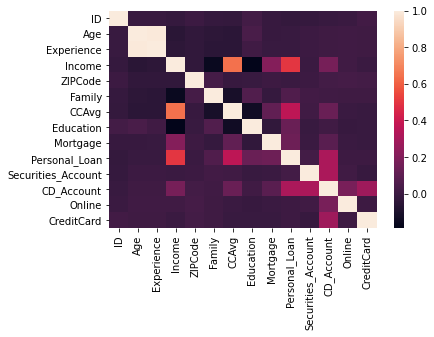

In [60]:
sns.heatmap(df.corr());

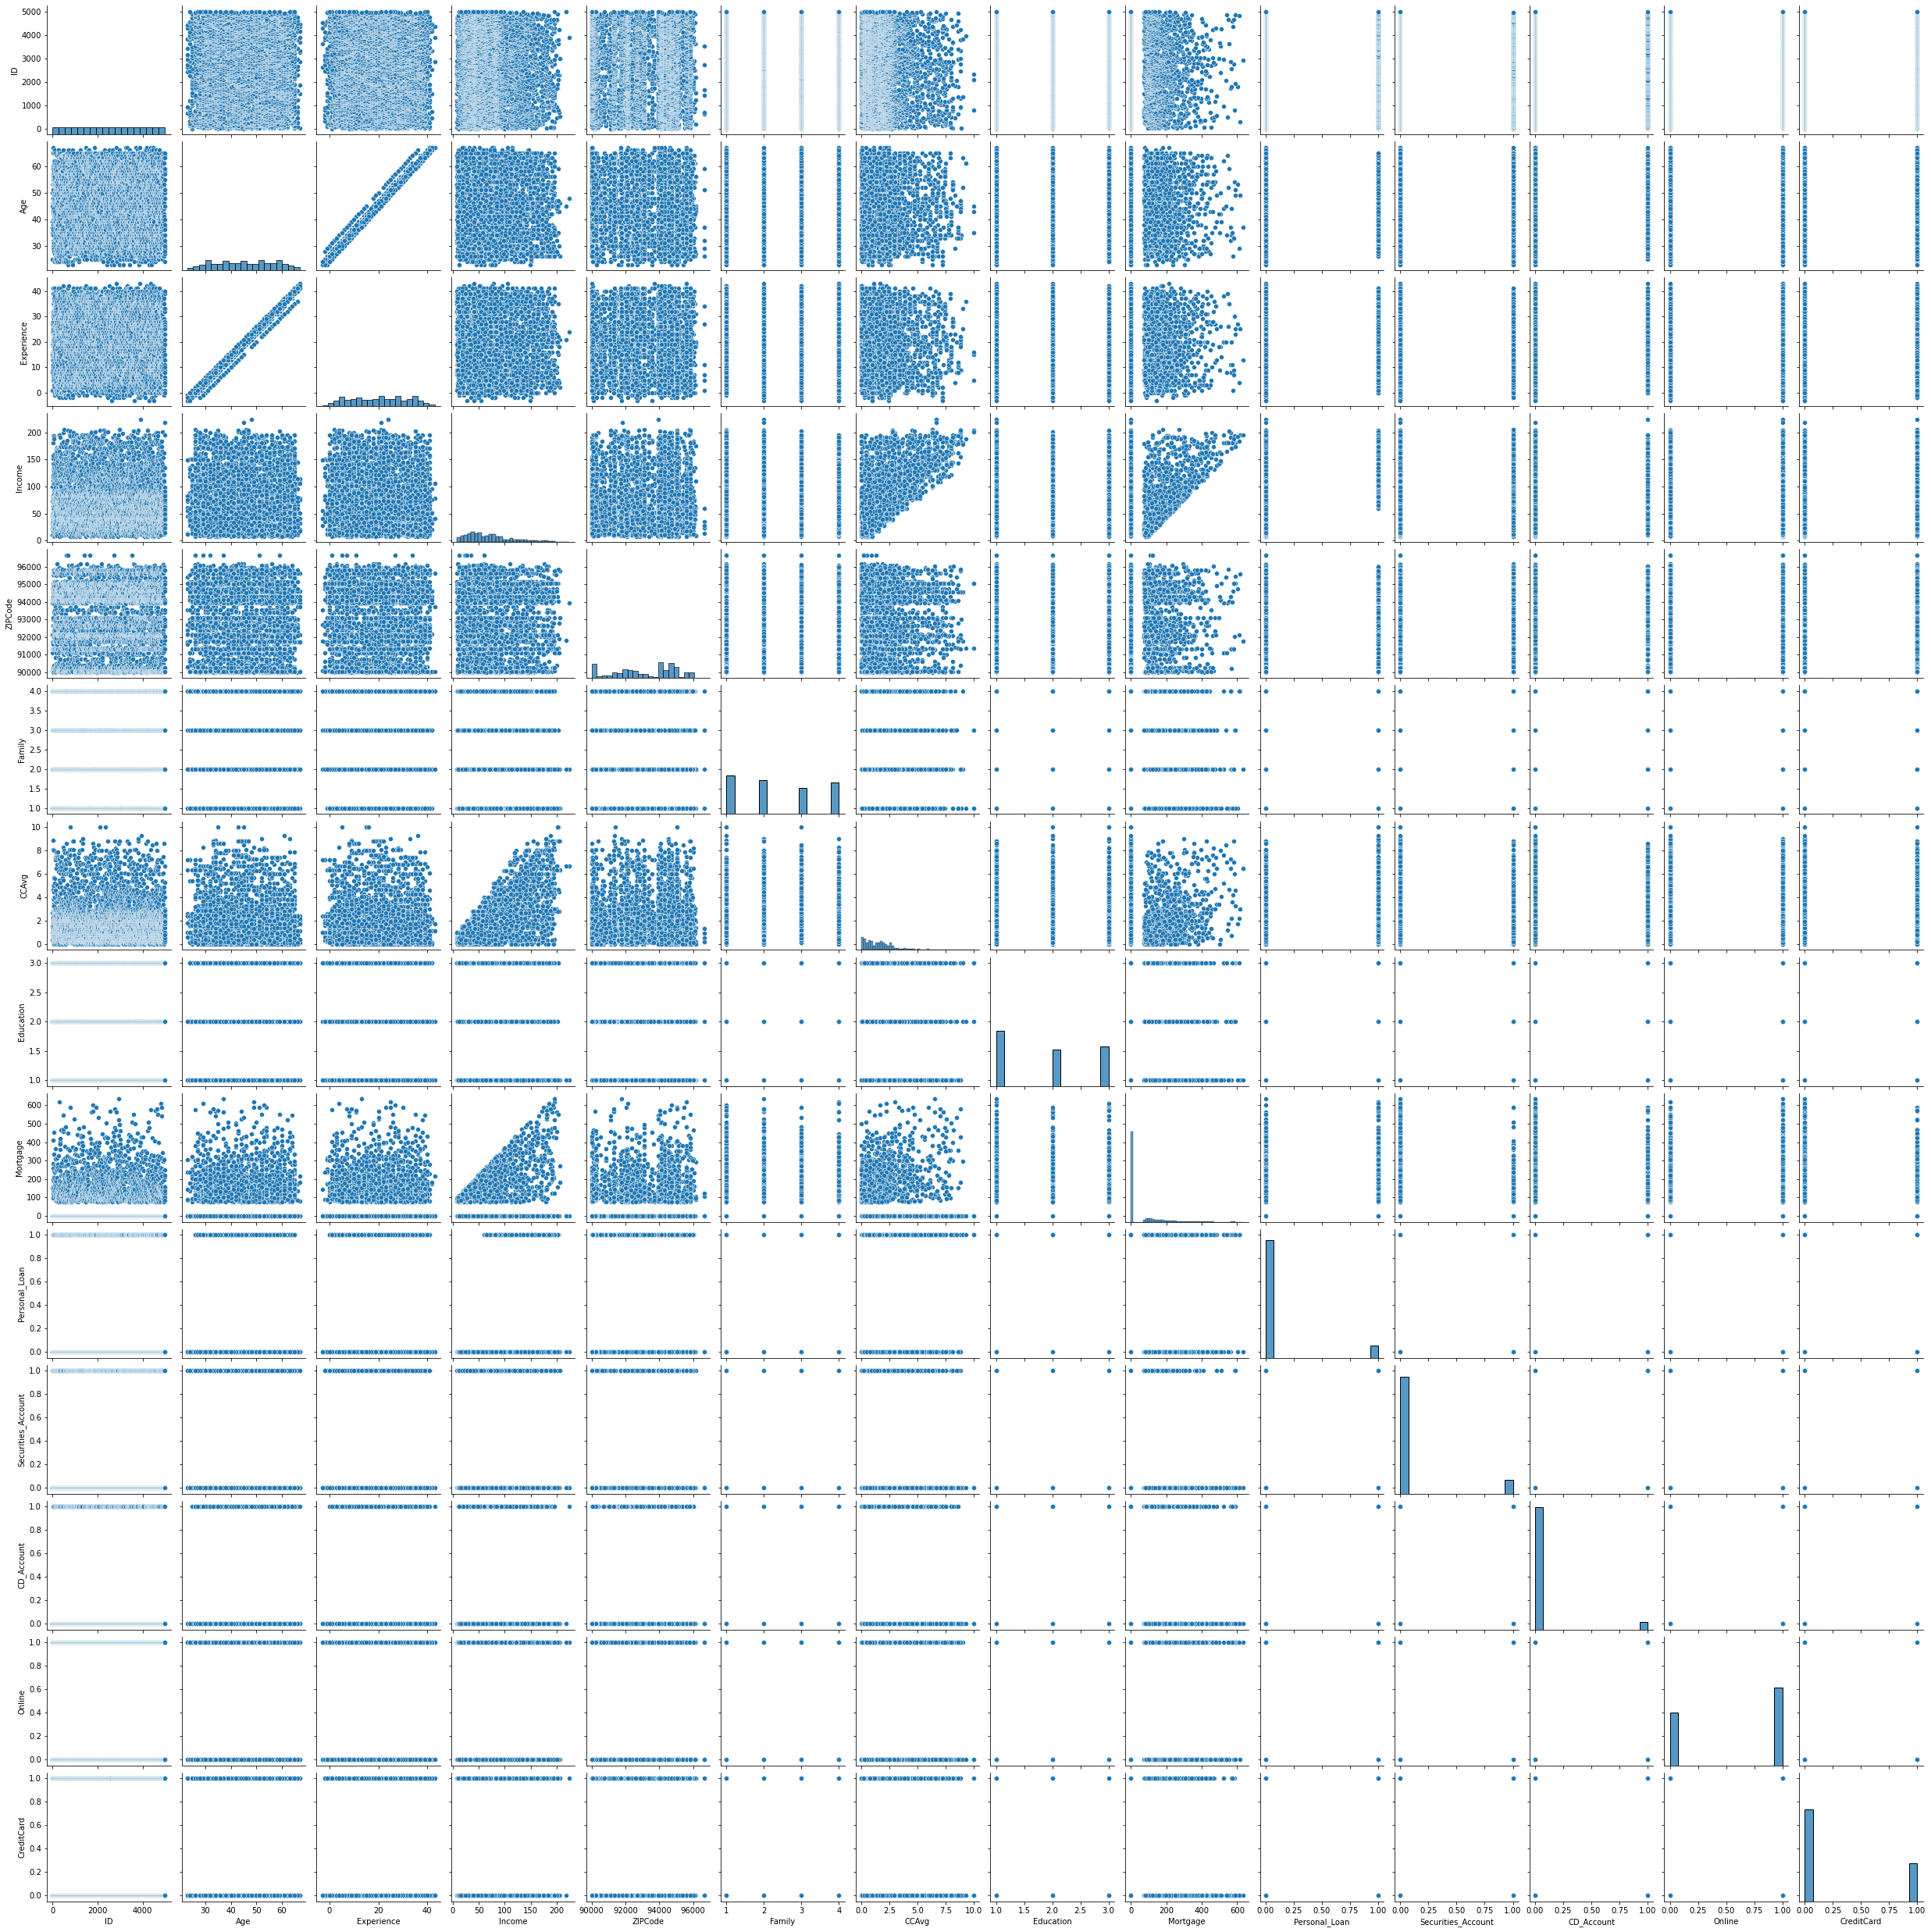

In [61]:
sns.pairplot(df);

# Observations/Summary from EDA

Data Description: <br>
1. There are no missing values in the dataset <br>
2. There are no duplicate rows in the dataset <br>
3. There are 5000 rows and 14 columns in the dataset <br>
4. All columns are of datatypes int64 or float64 <br>

Observations from EDA: <br>
1. Experience: 52 negative values in this column- could be a data entry issue. <br>
2. Income: distribution is skewed to the right- which means there are more customers with lower annual income and <br>
    a few customers with high annual income. Looks like there are also a few outliers in the Income column. <br>
3. Family: Customers with family size = 1 (single) are the most in the dataset, followed by family size = 2. <br>
    29% of customers are single, 25% of the customers are a couple <br>
4. CCAvg: distribution is skewed to the right- which means most customers have a lower monthly credit card <br>
    expense. 241 customers spend more than 6K on average per month. There are some outliers in this column. <br>
5. Education: A large number of customers are those who did not finish an undergraduate degree ~ 42\%. <br>
    28% of customers have an undergraduate degree and 30% of the customers have a professional degree. <br>
6. Mortgage: 69% of the customers do not have a mortgage. <br>
7. Personal_Loan: 90% of the customers do not have a personal loan. Percent of customers who took a personal <br>
    loan is 9.6%.
8. Securities_Account: 89.5% of the customers do not have a securities account. <br>
9. CD_Account: 94% of the customers do not have a CD account. <br>
10. Online: 3000 customers have an online presence and 2000 customers do not. <br>
11. CreditCard: 1500 customers have a credit card with another bank and 3500 customers do not have a credit card <br>
    with another bank.
12. Extremely high correlation betweek Age and Experience- will lead to multicollinearity. <br>
13. Customers who have taken the personal loan have an income of greater than 50K. <br>
14. No apparent relationship between Age, Experience, Family, CCAvg, Online, CreditCard and personal loan. <br>
14. Fewer customers have taken the personal loan who have Education level as 1, compared to levels 2 and 3. <br>
15. Customers who dont have a securities account mostly do not have a personal loan. <br>
16. Most customers who have a CD account also have a personal loan. <br>
17. Customers who have Education level 1 have higher income. <br>
18. CCAvg and Income have fairly high correlation ~0.6. <br>

# Objective

To predict whether a liability customer will buy a personal loan or not <br>
Which variables are most significant <br>
Which segment of customers should be targeted more

# Outlier Detection

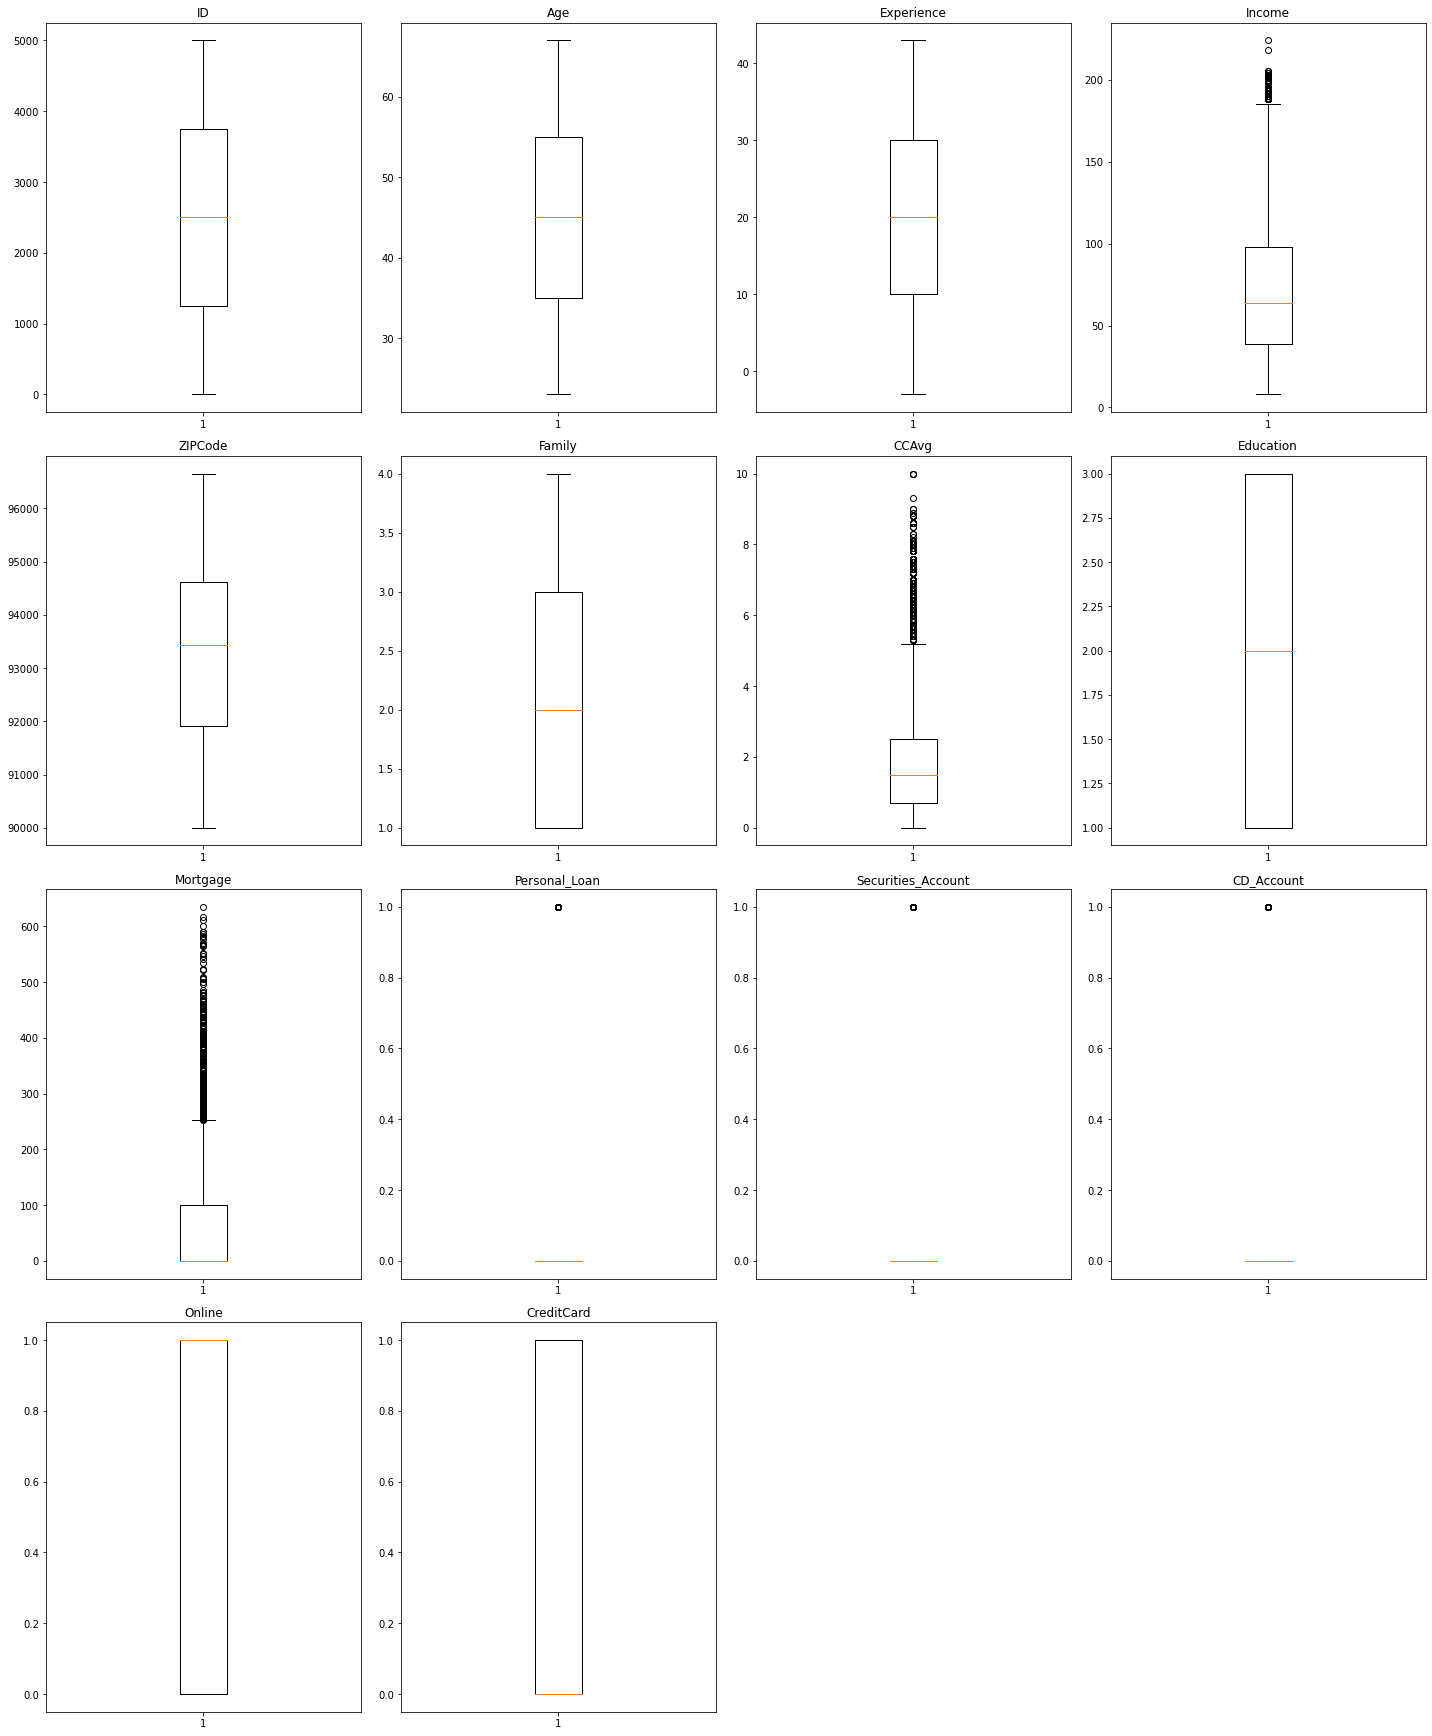

In [62]:
# checking all numerical columns for outliers
numerical_col = df.select_dtypes(include=np.number).columns.tolist()
plt.figure(figsize=(20, 30))

for i, variable in enumerate(numerical_col):
    plt.subplot(5, 4, i + 1)
    plt.boxplot(df[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

Outliers in Income, CCAvg, Mortgage columns

# Data Preprocessing

# Experience

In [63]:
df['Experience'].value_counts(ascending = True)

 43      3
-3       4
 42      8
-2      15
-1      33
 41     43
 40     57
 0      66
 1      74
 2      85
 39     85
 38     88
 12    102
 31    104
 4     113
 21    113
 36    114
 37    116
 11    116
 13    117
 33    117
 10    118
 15    119
 6     119
 8     119
 7     121
 22    124
 29    124
 17    125
 27    125
 34    125
 30    126
 16    127
 14    127
 3     129
 24    131
 26    134
 19    135
 18    137
 28    138
 25    142
 35    143
 23    144
 5     146
 9     147
 20    148
 32    154
Name: Experience, dtype: int64

In [64]:
# function to convert negative experience to absolute values

def preprocess_experience(num):
    """
    returns the absolute value of a number
    
    """
    
    return abs(num)

In [65]:
# applying the function to Experience
df['Experience'] = df['Experience'].apply(preprocess_experience)

In [66]:
df['Experience'].value_counts(ascending = True)

43      3
42      8
41     43
40     57
0      66
39     85
38     88
2     100
12    102
31    104
1     107
4     113
21    113
36    114
11    116
37    116
13    117
33    117
10    118
15    119
8     119
6     119
7     121
29    124
22    124
17    125
27    125
34    125
30    126
14    127
16    127
24    131
3     133
26    134
19    135
18    137
28    138
25    142
35    143
23    144
5     146
9     147
20    148
32    154
Name: Experience, dtype: int64

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


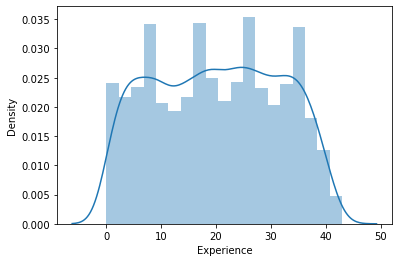

In [67]:
sns.distplot(df['Experience']);

# Income

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


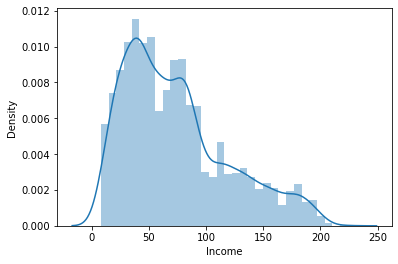

In [68]:
sns.distplot(df['Income']);

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Log(Income)')

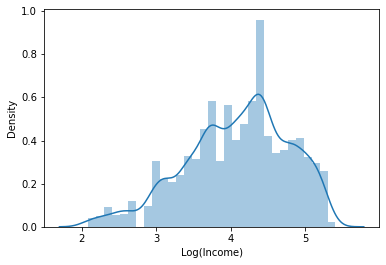

In [69]:
# check to see if skewness reduces using log transformation
sns.distplot(np.log(df['Income']), kde=True)
plt.xlabel("Log(Income)")

In [70]:
df['Income_log'] = np.log(df['Income'])

In [71]:
df.head()

ID  Age  Experience  Income  ZIPCode  Family  CCAvg  Education  Mortgage  \
0   1   25           1      49    91107       4    1.6          1         0   
1   2   45          19      34    90089       3    1.5          1         0   
2   3   39          15      11    94720       1    1.0          1         0   
3   4   35           9     100    94112       1    2.7          2         0   
4   5   35           8      45    91330       4    1.0          2         0   

   Personal_Loan  Securities_Account  CD_Account  Online  CreditCard  \
0              0                   1           0       0           0   
1              0                   1           0       0           0   
2              0                   0           0       0           0   
3              0                   0           0       0           0   
4              0                   0           0       0           1   

   Income_log  
0    3.891820  
1    3.526361  
2    2.397895  
3    4.605170  
4    3.806662

# Zipcode

In [72]:
# obtaining city information from the zipcode
city = []

for i in np.arange(0,len(df['ZIPCode'])):
    zipcode = search.by_zipcode(df['ZIPCode'][i])
    city.append(zipcode.major_city)

In [73]:
df['City'] = city
df.head()

ID  Age  Experience  Income  ZIPCode  Family  CCAvg  Education  Mortgage  \
0   1   25           1      49    91107       4    1.6          1         0   
1   2   45          19      34    90089       3    1.5          1         0   
2   3   39          15      11    94720       1    1.0          1         0   
3   4   35           9     100    94112       1    2.7          2         0   
4   5   35           8      45    91330       4    1.0          2         0   

   Personal_Loan  Securities_Account  CD_Account  Online  CreditCard  \
0              0                   1           0       0           0   
1              0                   1           0       0           0   
2              0                   0           0       0           0   
3              0                   0           0       0           0   
4              0                   0           0       0           1   

   Income_log           City  
0    3.891820       Pasadena  
1    3.526361    Los Angeles  
2    2.397895       Berkeley  
3    4.605170  San Francisco  
4    3.806662     Northridge

In [74]:
df['City'].nunique()
# 244 unique cities in the dataset- will need to create 244 dummies
# This can be further reduced by using the county info for each city

244

In [75]:
# obtaining county information from the zipcode
county = []

for i in np.arange(0,len(df['ZIPCode'])):
    zipcode = search.by_zipcode(df['ZIPCode'][i])
    county.append(zipcode.county)

In [76]:
df['County'] = county
df.head()

ID  Age  Experience  Income  ZIPCode  Family  CCAvg  Education  Mortgage  \
0   1   25           1      49    91107       4    1.6          1         0   
1   2   45          19      34    90089       3    1.5          1         0   
2   3   39          15      11    94720       1    1.0          1         0   
3   4   35           9     100    94112       1    2.7          2         0   
4   5   35           8      45    91330       4    1.0          2         0   

   Personal_Loan  Securities_Account  CD_Account  Online  CreditCard  \
0              0                   1           0       0           0   
1              0                   1           0       0           0   
2              0                   0           0       0           0   
3              0                   0           0       0           0   
4              0                   0           0       0           1   

   Income_log           City                County  
0    3.891820       Pasadena    Los Angeles County  
1    3.526361    Los Angeles    Los Angeles County  
2    2.397895       Berkeley        Alameda County  
3    4.605170  San Francisco  San Francisco County  
4    3.806662     Northridge    Los Angeles County

In [77]:
df['County'].nunique()
# 38 unique counties

38

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


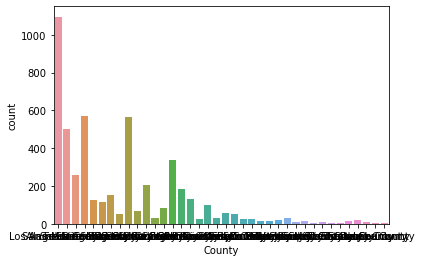

In [78]:
sns.countplot(df['County']);

In [79]:
df['County'].unique()

array(['Los Angeles County', 'Alameda County', 'San Francisco County',
       'San Diego County', 'Monterey County', 'Ventura County',
       'Santa Barbara County', 'Marin County', 'Santa Clara County',
       'Santa Cruz County', 'San Mateo County', 'Humboldt County',
       'Contra Costa County', 'Orange County', 'Sacramento County',
       'Yolo County', 'Placer County', 'San Bernardino County',
       'San Luis Obispo County', 'Riverside County', 'Kern County', None,
       'Fresno County', 'Sonoma County', 'El Dorado County',
       'San Benito County', 'Butte County', 'Solano County',
       'Mendocino County', 'San Joaquin County', 'Imperial County',
       'Siskiyou County', 'Merced County', 'Trinity County',
       'Stanislaus County', 'Shasta County', 'Tuolumne County',
       'Napa County', 'Lake County'], dtype=object)

# Removing 'None' in County

In [80]:
def county_preprocess (county):
    return str(county)

df['County'] = df['County'].apply(county_preprocess)
df.head()

ID  Age  Experience  Income  ZIPCode  Family  CCAvg  Education  Mortgage  \
0   1   25           1      49    91107       4    1.6          1         0   
1   2   45          19      34    90089       3    1.5          1         0   
2   3   39          15      11    94720       1    1.0          1         0   
3   4   35           9     100    94112       1    2.7          2         0   
4   5   35           8      45    91330       4    1.0          2         0   

   Personal_Loan  Securities_Account  CD_Account  Online  CreditCard  \
0              0                   1           0       0           0   
1              0                   1           0       0           0   
2              0                   0           0       0           0   
3              0                   0           0       0           0   
4              0                   0           0       0           1   

   Income_log           City                County  
0    3.891820       Pasadena    Los Angeles County  
1    3.526361    Los Angeles    Los Angeles County  
2    2.397895       Berkeley        Alameda County  
3    4.605170  San Francisco  San Francisco County  
4    3.806662     Northridge    Los Angeles County

In [81]:
df[df['County'] == 'None'].count()

ID                    34
Age                   34
Experience            34
Income                34
ZIPCode               34
Family                34
CCAvg                 34
Education             34
Mortgage              34
Personal_Loan         34
Securities_Account    34
CD_Account            34
Online                34
CreditCard            34
Income_log            34
City                   0
County                34
dtype: int64

In [82]:
index_names = df[df['County'] == 'None'].index
  
# drop these row indexes from the dataframe
df.drop(index_names, inplace = True)

df.shape

(4966, 17)

In [83]:
df['County'].nunique()

38

# CCAvg

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


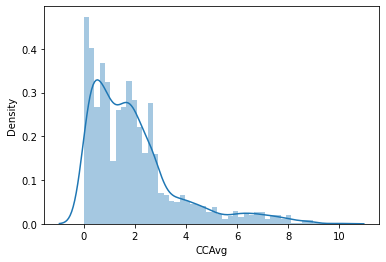

In [84]:
sns.distplot(df['CCAvg']);

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Log(CCAvg)')

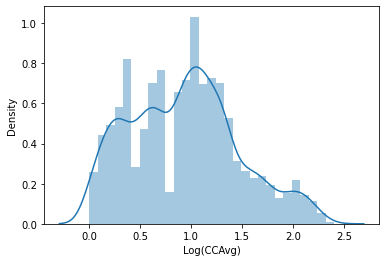

In [85]:
# check to see if skewness reduces using log transformation
sns.distplot(np.log(df['CCAvg'] + 1), kde=True)
plt.xlabel("Log(CCAvg)")

In [86]:
df['CCAvg_log'] = np.log(df['CCAvg'] + 1)

In [87]:
df.head()

ID  Age  Experience  Income  ZIPCode  Family  CCAvg  Education  Mortgage  \
0   1   25           1      49    91107       4    1.6          1         0   
1   2   45          19      34    90089       3    1.5          1         0   
2   3   39          15      11    94720       1    1.0          1         0   
3   4   35           9     100    94112       1    2.7          2         0   
4   5   35           8      45    91330       4    1.0          2         0   

   Personal_Loan  Securities_Account  CD_Account  Online  CreditCard  \
0              0                   1           0       0           0   
1              0                   1           0       0           0   
2              0                   0           0       0           0   
3              0                   0           0       0           0   
4              0                   0           0       0           1   

   Income_log           City                County  CCAvg_log  
0    3.891820       Pasadena    Los Angeles County   0.955511  
1    3.526361    Los Angeles    Los Angeles County   0.916291  
2    2.397895       Berkeley        Alameda County   0.693147  
3    4.605170  San Francisco  San Francisco County   1.308333  
4    3.806662     Northridge    Los Angeles County   0.693147

# Mortgage

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


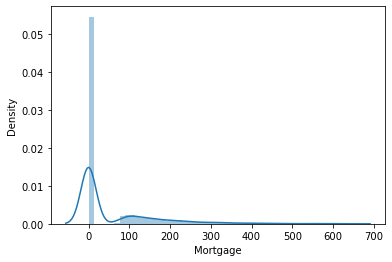

In [88]:
sns.distplot(df['Mortgage']);

Since many customers do not have a mortgage, it would be best to create a column that says if a customer has a <br>
mortgage or no

In [89]:
def mortgage(mortgage):
    """
    returns 1 or 0 for if a customer has a mortgage or no
    
    """
    
    if mortgage == 0:
        return 0
    else:
        return 1

In [90]:
mortgage(23)

1

In [91]:
df['Mortgage_Bin'] = df['Mortgage'].apply(mortgage)

In [92]:
df.head()

ID  Age  Experience  Income  ZIPCode  Family  CCAvg  Education  Mortgage  \
0   1   25           1      49    91107       4    1.6          1         0   
1   2   45          19      34    90089       3    1.5          1         0   
2   3   39          15      11    94720       1    1.0          1         0   
3   4   35           9     100    94112       1    2.7          2         0   
4   5   35           8      45    91330       4    1.0          2         0   

   Personal_Loan  Securities_Account  CD_Account  Online  CreditCard  \
0              0                   1           0       0           0   
1              0                   1           0       0           0   
2              0                   0           0       0           0   
3              0                   0           0       0           0   
4              0                   0           0       0           1   

   Income_log           City                County  CCAvg_log  Mortgage_Bin  
0    3.891820       Pasadena    Los Angeles County   0.955511             0  
1    3.526361    Los Angeles    Los Angeles County   0.916291             0  
2    2.397895       Berkeley        Alameda County   0.693147             0  
3    4.605170  San Francisco  San Francisco County   1.308333             0  
4    3.806662     Northridge    Los Angeles County   0.693147             0

In [93]:
df.tail()

ID  Age  Experience  Income  ZIPCode  Family  CCAvg  Education  \
4995  4996   29           3      40    92697       1    1.9          3   
4996  4997   30           4      15    92037       4    0.4          1   
4997  4998   63          39      24    93023       2    0.3          3   
4998  4999   65          40      49    90034       3    0.5          2   
4999  5000   28           4      83    92612       3    0.8          1   

      Mortgage  Personal_Loan  Securities_Account  CD_Account  Online  \
4995         0              0                   0           0       1   
4996        85              0                   0           0       1   
4997         0              0                   0           0       0   
4998         0              0                   0           0       1   
4999         0              0                   0           0       1   

      CreditCard  Income_log         City              County  CCAvg_log  \
4995           0    3.688879       Irvine       Orange County   1.064711   
4996           0    2.708050     La Jolla    San Diego County   0.336472   
4997           0    3.178054         Ojai      Ventura County   0.262364   
4998           0    3.891820  Los Angeles  Los Angeles County   0.405465   
4999           1    4.418841       Irvine       Orange County   0.587787   

      Mortgage_Bin  
4995             0  
4996             1  
4997             0  
4998             0  
4999             0

In [94]:
df.dtypes

ID                      int64
Age                     int64
Experience              int64
Income                  int64
ZIPCode                 int64
Family                  int64
CCAvg                 float64
Education               int64
Mortgage                int64
Personal_Loan           int64
Securities_Account      int64
CD_Account              int64
Online                  int64
CreditCard              int64
Income_log            float64
City                   object
County                 object
CCAvg_log             float64
Mortgage_Bin            int64
dtype: object

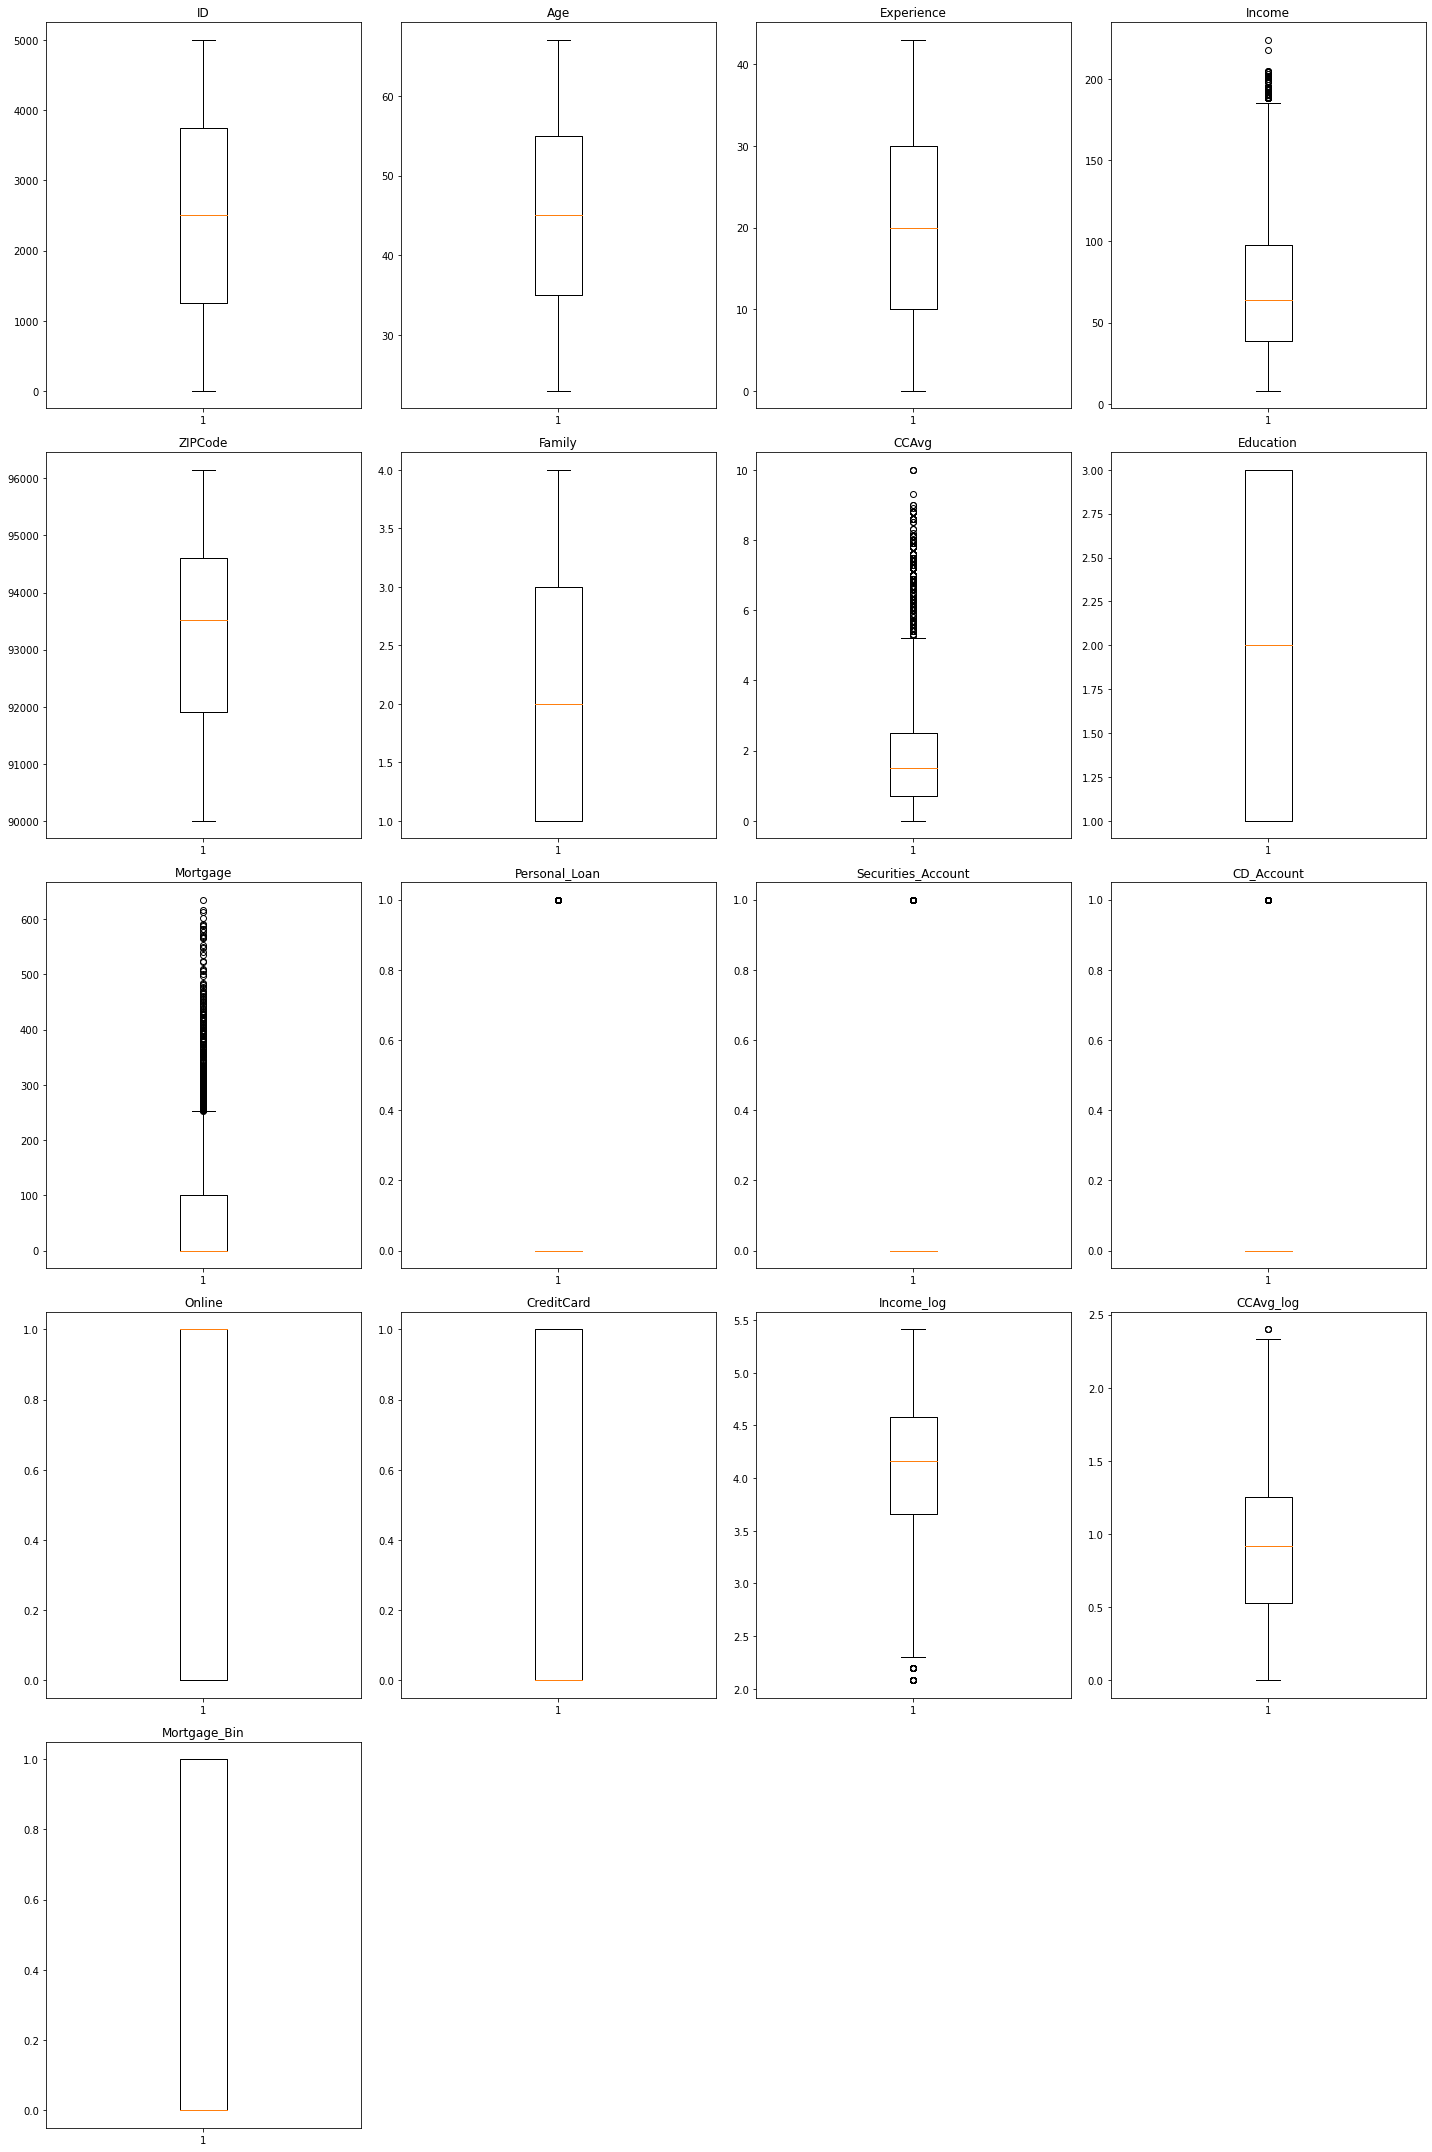

In [95]:
# checking all numerical columns for outliers
numerical_col = df.select_dtypes(include=np.number).columns.tolist()
plt.figure(figsize=(20, 30))

for i, variable in enumerate(numerical_col):
    plt.subplot(5, 4, i + 1)
    plt.boxplot(df[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

Income_Log and CCAvg_Log have a couple outliers- we can drop these values

# Feature Engineering/Selection

In [96]:
df.head()

ID  Age  Experience  Income  ZIPCode  Family  CCAvg  Education  Mortgage  \
0   1   25           1      49    91107       4    1.6          1         0   
1   2   45          19      34    90089       3    1.5          1         0   
2   3   39          15      11    94720       1    1.0          1         0   
3   4   35           9     100    94112       1    2.7          2         0   
4   5   35           8      45    91330       4    1.0          2         0   

   Personal_Loan  Securities_Account  CD_Account  Online  CreditCard  \
0              0                   1           0       0           0   
1              0                   1           0       0           0   
2              0                   0           0       0           0   
3              0                   0           0       0           0   
4              0                   0           0       0           1   

   Income_log           City                County  CCAvg_log  Mortgage_Bin  
0    3.891820       Pasadena    Los Angeles County   0.955511             0  
1    3.526361    Los Angeles    Los Angeles County   0.916291             0  
2    2.397895       Berkeley        Alameda County   0.693147             0  
3    4.605170  San Francisco  San Francisco County   1.308333             0  
4    3.806662     Northridge    Los Angeles County   0.693147             0

Personal_Loan: Dependent Variable <br>

ID: Just a unique ID for each customer, will not help with prediction. Can be dropped. <br>
Income: Created a log transformed income column to remove skewness. Can be dropped. <br>
ZipCode: Used this to come up with county information for each customer. Can be dropped. <br> 
CCAvg: Created a log transformed CCAvg column to remove skewness. Can be dropped. <br>
Mortgage: Created a column to give a yes or no classification for Mortgage. Can be dropped. <br> 
City: too many cities to create dummy variables, will use county instead. Can be dropped.

In [97]:
df.dtypes

ID                      int64
Age                     int64
Experience              int64
Income                  int64
ZIPCode                 int64
Family                  int64
CCAvg                 float64
Education               int64
Mortgage                int64
Personal_Loan           int64
Securities_Account      int64
CD_Account              int64
Online                  int64
CreditCard              int64
Income_log            float64
City                   object
County                 object
CCAvg_log             float64
Mortgage_Bin            int64
dtype: object

In [98]:
df1 = df.drop(['ID', 'CCAvg', 'Mortgage', 'City'], axis=1, inplace=False)

In [99]:
df1.head()

Age  Experience  Income  ZIPCode  Family  Education  Personal_Loan  \
0   25           1      49    91107       4          1              0   
1   45          19      34    90089       3          1              0   
2   39          15      11    94720       1          1              0   
3   35           9     100    94112       1          2              0   
4   35           8      45    91330       4          2              0   

   Securities_Account  CD_Account  Online  CreditCard  Income_log  \
0                   1           0       0           0    3.891820   
1                   1           0       0           0    3.526361   
2                   0           0       0           0    2.397895   
3                   0           0       0           0    4.605170   
4                   0           0       0           1    3.806662   

                 County  CCAvg_log  Mortgage_Bin  
0    Los Angeles County   0.955511             0  
1    Los Angeles County   0.916291             0  
2        Alameda County   0.693147             0  
3  San Francisco County   1.308333             0  
4    Los Angeles County   0.693147             0

In [100]:
df1.dtypes

Age                     int64
Experience              int64
Income                  int64
ZIPCode                 int64
Family                  int64
Education               int64
Personal_Loan           int64
Securities_Account      int64
CD_Account              int64
Online                  int64
CreditCard              int64
Income_log            float64
County                 object
CCAvg_log             float64
Mortgage_Bin            int64
dtype: object

# Split Data

In [101]:
# Library to split data
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# To build model for prediction
import statsmodels.stats.api as sms
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from statsmodels.tools.tools import add_constant
from sklearn.linear_model import LogisticRegression

# To get diferent metric scores
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    plot_confusion_matrix,
    precision_recall_curve,
    roc_curve,
)


In [102]:
# Splitting data in train and test sets

X = df1.drop(['Personal_Loan'], axis=1)
Y = df1[['Personal_Loan']]

X = pd.get_dummies(X, drop_first=True)

# X.head()
# X.tail()
# len(X.columns)


In [103]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=1)

In [104]:
X_train.dtypes

Age                                int64
Experience                         int64
Income                             int64
ZIPCode                            int64
Family                             int64
Education                          int64
Securities_Account                 int64
CD_Account                         int64
Online                             int64
CreditCard                         int64
Income_log                       float64
CCAvg_log                        float64
Mortgage_Bin                       int64
County_Butte County                uint8
County_Contra Costa County         uint8
County_El Dorado County            uint8
County_Fresno County               uint8
County_Humboldt County             uint8
County_Imperial County             uint8
County_Kern County                 uint8
County_Lake County                 uint8
County_Los Angeles County          uint8
County_Marin County                uint8
County_Mendocino County            uint8
County_Merced Co

In [105]:
print("Shape of Training set : ", X_train.shape)
print("Shape of test set : ", X_test.shape)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set :  (3476, 50)
Shape of test set :  (1490, 50)
Percentage of classes in training set:
Personal_Loan
0                0.905351
1                0.094649
dtype: float64
Percentage of classes in test set:
Personal_Loan
0                0.900671
1                0.099329
dtype: float64


# Model Evaluation Criteria

Model can make wrong predictions as:
1. Predicting a customer will buy a personal loan when they do not
2. Predicting a customer will not buy a personal loan when they actually do

Which case is more important?
In this case, I think predicting a customer will buy a personal loan when they do not is bad. <br>
Because the bank would assume a certain profit level because of the incorrect prediction. <br>
Predicting a customer will not buy when they end up buying might also be an unfavorable scenario for the bank. <br>
Becuase the bank now has a situation they did not account for. <br>

Since both scenarios are bad, I will maximize f1 score as the greater the f1 score, the higher the chances of identifying both classes correctly.

# Defining Functions for Error Metrics and Confusion Matrix

In [106]:
# defining a function to compute different metrics to check performance of a classification model built using statsmodels

def model_performance_classification_statsmodels(model, predictors, target, threshold=0.5):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """

    # checking which probabilities are greater than threshold
    pred_temp = model.predict(predictors) > threshold
    # rounding off the above values to get classes
    pred = np.round(pred_temp)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [107]:
# defining a function to plot the confusion_matrix of a classification model

def confusion_matrix_statsmodels(model, predictors, target, threshold=0.5):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """
    y_pred = model.predict(predictors) > threshold
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

# Logistics Regression (with sklearn library)

In [108]:
lg = LogisticRegression(solver="newton-cg", random_state=1)
model = lg.fit(X_train, y_train)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line sea

# Checking Model Performance on Training Set

In [109]:
# predicting on training set
y_pred_train = lg.predict(X_train)

In [110]:
print("Training set performance:")
print("Accuracy:", accuracy_score(y_train, y_pred_train))
print("Precision:", precision_score(y_train, y_pred_train))
print("Recall:", recall_score(y_train, y_pred_train))
print("F1:", f1_score(y_train, y_pred_train))

Training set performance:
Accuracy: 0.9533947065592635
Precision: 0.8326693227091634
Recall: 0.6352583586626139
F1: 0.7206896551724138


# Checking Model Performance on Test Set

In [111]:
# predicting on the test set
y_pred_test = lg.predict(X_test)

In [112]:
print("Test set performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_test))
print("Precision:", precision_score(y_test, y_pred_test))
print("Recall:", recall_score(y_test, y_pred_test))
print("F1:", f1_score(y_test, y_pred_test))

Test set performance:
Accuracy: 0.9543624161073826
Precision: 0.8636363636363636
Recall: 0.6418918918918919
F1: 0.7364341085271319


# Observations

The training and testing f1_scores are close (0.72 and 0.73). <br>
f1_score on the train and test sets are comparable. <br>
This shows that the model is showing generalised results. <br>
We have build a logistic regression model which shows good performance on the train and test sets. <br>
However, to identify significant variables we will have to build a logistic regression model using the statsmodels library.

# Logistics Regression (with statsmodel library) Model

In [113]:
X = df1.drop(['Personal_Loan'], axis=1)
Y = df1[['Personal_Loan']]

X = pd.get_dummies(X, drop_first=True)

# X.head()
# X.tail()
# len(X.columns)

# adding constant
# X = sm.add_constant(X)

# Splitting data in train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=1)

In [114]:
# fitting logistic regression model

logit = sm.Logit(y_train, X_train.astype(float))
lg = logit.fit(disp=False)

print(lg.summary())

LinAlgError: Singular matrix

There are some counties for which Personal_Loan has only one type (0)- this is causing the singular matrix error

# Data Processing- County

In [115]:
df1_county = df1[['Personal_Loan']].groupby(df1['County']).sum()
type(df1_county)

county_merge= df1_county[df1_county['Personal_Loan'] < 40].index.to_list()
county_merge

['Butte County',
 'Contra Costa County',
 'El Dorado County',
 'Fresno County',
 'Humboldt County',
 'Imperial County',
 'Kern County',
 'Lake County',
 'Marin County',
 'Mendocino County',
 'Merced County',
 'Monterey County',
 'Napa County',
 'Orange County',
 'Placer County',
 'Riverside County',
 'Sacramento County',
 'San Benito County',
 'San Bernardino County',
 'San Francisco County',
 'San Joaquin County',
 'San Luis Obispo County',
 'San Mateo County',
 'Santa Barbara County',
 'Santa Cruz County',
 'Shasta County',
 'Siskiyou County',
 'Solano County',
 'Sonoma County',
 'Stanislaus County',
 'Trinity County',
 'Tuolumne County',
 'Ventura County',
 'Yolo County']

In [116]:
def county_preprocess2 (county):
    return 'Other' if county in county_merge else county


In [117]:
county_preprocess2('Butte County')

'Other'

In [118]:
df1['County'] = df1['County'].apply(county_preprocess2)
df1['County'].unique()

array(['Los Angeles County', 'Alameda County', 'Other',
       'San Diego County', 'Santa Clara County'], dtype=object)

In [119]:
df1.head()

Age  Experience  Income  ZIPCode  Family  Education  Personal_Loan  \
0   25           1      49    91107       4          1              0   
1   45          19      34    90089       3          1              0   
2   39          15      11    94720       1          1              0   
3   35           9     100    94112       1          2              0   
4   35           8      45    91330       4          2              0   

   Securities_Account  CD_Account  Online  CreditCard  Income_log  \
0                   1           0       0           0    3.891820   
1                   1           0       0           0    3.526361   
2                   0           0       0           0    2.397895   
3                   0           0       0           0    4.605170   
4                   0           0       0           1    3.806662   

               County  CCAvg_log  Mortgage_Bin  
0  Los Angeles County   0.955511             0  
1  Los Angeles County   0.916291             0  
2      Alameda County   0.693147             0  
3               Other   1.308333             0  
4  Los Angeles County   0.693147             0

In [120]:
df1['Personal_Loan'].groupby(df1['County']).sum()

County
Alameda County         44
Los Angeles County    111
Other                 192
San Diego County       59
Santa Clara County     71
Name: Personal_Loan, dtype: int64

# Logistics Regression (with statsmodel library) Model

# Iteration 1- Having all Features

In [121]:
X1 = df1.drop(['Personal_Loan'], axis=1)
Y1 = df1[['Personal_Loan']]

X1 = pd.get_dummies(X1, drop_first=True)

# X.head()
# X.tail()
# len(X.columns)

# adding constant
# X = sm.add_constant(X)

# Splitting data in train and test sets
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, Y1, test_size=0.30, random_state=1)

In [122]:
X1.head()

Age  Experience  Income  ZIPCode  Family  Education  Securities_Account  \
0   25           1      49    91107       4          1                   1   
1   45          19      34    90089       3          1                   1   
2   39          15      11    94720       1          1                   0   
3   35           9     100    94112       1          2                   0   
4   35           8      45    91330       4          2                   0   

   CD_Account  Online  CreditCard  Income_log  CCAvg_log  Mortgage_Bin  \
0           0       0           0    3.891820   0.955511             0   
1           0       0           0    3.526361   0.916291             0   
2           0       0           0    2.397895   0.693147             0   
3           0       0           0    4.605170   1.308333             0   
4           0       0           1    3.806662   0.693147             0   

   County_Los Angeles County  County_Other  County_San Diego County  \
0                          1             0                        0   
1                          1             0                        0   
2                          0             0                        0   
3                          0             1                        0   
4                          1             0                        0   

   County_Santa Clara County  
0                          0  
1                          0  
2                          0  
3                          0  
4                          0

In [123]:
# fitting logistic regression model

logit = sm.Logit(y1_train, X1_train.astype(float))
lg1 = logit.fit(disp=False)

print(lg1.summary())

                           Logit Regression Results                           
Dep. Variable:          Personal_Loan   No. Observations:                 3476
Model:                          Logit   Df Residuals:                     3459
Method:                           MLE   Df Model:                           16
Date:                Fri, 30 Jul 2021   Pseudo R-squ.:                  0.6403
Time:                        21:21:39   Log-Likelihood:                -391.51
converged:                       True   LL-Null:                       -1088.6
Covariance Type:            nonrobust   LLR p-value:                3.013e-287
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Age                          -0.0809      0.084     -0.963      0.335      -0.245       0.084
Experience                    0.0899      0.084      1.069      0.285      -0.075     

In [124]:
print("Training performance:")
model_performance_classification_statsmodels(lg1, X1_train, y1_train)

Training performance:


Accuracy    Recall  Precision        F1
0  0.954545  0.671733   0.815498  0.736667

# Observations

1. Columns that are not significant- Mortgage_Bin, Age, Experience, County_Santa Clara_county <br>
2. Multicollinearity could be affecting the p-values. <br>
3. Positive values of the coefficient show that that probability of customer taking the loan increases with <br>
the increase of corresponding attribute value. <br> 
4. Negative values of the coefficient shows that probability of customer being a defaulter decreases with the <br>
increase of corresponding attribute value. <br>


# Multicollinearity

In [125]:
vif_series = pd.Series(
    [variance_inflation_factor(X1_train.values, i) for i in range(X1_train.shape[1])],
    index=X1_train.columns,
    dtype=float,
)
print("Series before feature selection: \n\n{}\n".format(vif_series))

Series before feature selection: 

Age                          1410.901447
Experience                    348.306232
Income                         27.857894
ZIPCode                       513.782011
Family                          5.602612
Education                       6.781128
Securities_Account              1.277168
CD_Account                      1.413695
Online                          2.566555
CreditCard                      1.577463
Income_log                    259.795612
CCAvg_log                       6.455543
Mortgage_Bin                    1.449539
County_Los Angeles County       3.235946
County_Other                    5.375668
County_San Diego County         2.178998
County_Santa Clara County       2.083126
dtype: float64



# Iteration 2- Dropping Age

In [126]:
X2 = df1.drop(['Personal_Loan', 'Age'], axis=1)
Y2 = df1[['Personal_Loan']]

X2 = pd.get_dummies(X2, drop_first=True)

# X.head()
# X.tail()
# len(X.columns)

# adding constant
# X = sm.add_constant(X)

# Splitting data in train and test sets
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, Y2, test_size=0.30, random_state=1)

In [127]:
X2.head()

Experience  Income  ZIPCode  Family  Education  Securities_Account  \
0           1      49    91107       4          1                   1   
1          19      34    90089       3          1                   1   
2          15      11    94720       1          1                   0   
3           9     100    94112       1          2                   0   
4           8      45    91330       4          2                   0   

   CD_Account  Online  CreditCard  Income_log  CCAvg_log  Mortgage_Bin  \
0           0       0           0    3.891820   0.955511             0   
1           0       0           0    3.526361   0.916291             0   
2           0       0           0    2.397895   0.693147             0   
3           0       0           0    4.605170   1.308333             0   
4           0       0           1    3.806662   0.693147             0   

   County_Los Angeles County  County_Other  County_San Diego County  \
0                          1             0                        0   
1                          1             0                        0   
2                          0             0                        0   
3                          0             1                        0   
4                          1             0                        0   

   County_Santa Clara County  
0                          0  
1                          0  
2                          0  
3                          0  
4                          0

In [128]:
# fitting logistic regression model

logit = sm.Logit(y2_train, X2_train.astype(float))
lg2 = logit.fit(disp=False)

print(lg2.summary())

                           Logit Regression Results                           
Dep. Variable:          Personal_Loan   No. Observations:                 3476
Model:                          Logit   Df Residuals:                     3460
Method:                           MLE   Df Model:                           15
Date:                Fri, 30 Jul 2021   Pseudo R-squ.:                  0.6399
Time:                        21:21:48   Log-Likelihood:                -391.98
converged:                       True   LL-Null:                       -1088.6
Covariance Type:            nonrobust   LLR p-value:                4.902e-288
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Experience                    0.0093      0.008      1.154      0.248      -0.007       0.025
Income                       -0.0392      0.013     -3.118      0.002      -0.064     

In [129]:
print("Training performance:")
model_performance_classification_statsmodels(lg2, X2_train, y2_train)

Training performance:


Accuracy    Recall  Precision        F1
0  0.954258  0.668693   0.814815  0.734558

In [130]:
vif_series = pd.Series(
    [variance_inflation_factor(X2_train.values, i) for i in range(X2_train.shape[1])],
    index=X2_train.columns,
    dtype=float,
)
print("Series before feature selection: \n\n{}\n".format(vif_series))

Series before feature selection: 

Experience                     4.124315
Income                        27.802120
ZIPCode                      156.662585
Family                         5.598270
Education                      6.348548
Securities_Account             1.276948
CD_Account                     1.413279
Online                         2.566531
CreditCard                     1.577375
Income_log                   259.513810
CCAvg_log                      6.443462
Mortgage_Bin                   1.449432
County_Los Angeles County      3.087451
County_Other                   5.370341
County_San Diego County        2.140479
County_Santa Clara County      2.082997
dtype: float64



# Iteration 3- Dropping Income_log

In [131]:
X3 = df1.drop(['Personal_Loan', 'Income_log'], axis=1)
Y3 = df1[['Personal_Loan']]

X3 = pd.get_dummies(X3, drop_first=True)

# X.head()
# X.tail()
# len(X.columns)

# adding constant
# X = sm.add_constant(X)

# Splitting data in train and test sets
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, Y3, test_size=0.30, random_state=1)

In [132]:
X3.head()

Age  Experience  Income  ZIPCode  Family  Education  Securities_Account  \
0   25           1      49    91107       4          1                   1   
1   45          19      34    90089       3          1                   1   
2   39          15      11    94720       1          1                   0   
3   35           9     100    94112       1          2                   0   
4   35           8      45    91330       4          2                   0   

   CD_Account  Online  CreditCard  CCAvg_log  Mortgage_Bin  \
0           0       0           0   0.955511             0   
1           0       0           0   0.916291             0   
2           0       0           0   0.693147             0   
3           0       0           0   1.308333             0   
4           0       0           1   0.693147             0   

   County_Los Angeles County  County_Other  County_San Diego County  \
0                          1             0                        0   
1                          1             0                        0   
2                          0             0                        0   
3                          0             1                        0   
4                          1             0                        0   

   County_Santa Clara County  
0                          0  
1                          0  
2                          0  
3                          0  
4                          0

In [133]:
# fitting logistic regression model

logit = sm.Logit(y3_train, X3_train.astype(float))
lg3 = logit.fit(disp=False)

print(lg3.summary())

                           Logit Regression Results                           
Dep. Variable:          Personal_Loan   No. Observations:                 3476
Model:                          Logit   Df Residuals:                     3460
Method:                           MLE   Df Model:                           15
Date:                Fri, 30 Jul 2021   Pseudo R-squ.:                  0.6084
Time:                        21:21:53   Log-Likelihood:                -426.30
converged:                       True   LL-Null:                       -1088.6
Covariance Type:            nonrobust   LLR p-value:                2.839e-273
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Age                          -0.0505      0.075     -0.672      0.502      -0.198       0.097
Experience                    0.0615      0.075      0.818      0.413      -0.086     

In [134]:
print("Training performance:")
model_performance_classification_statsmodels(lg3, X3_train, y3_train)

Training performance:


Accuracy    Recall  Precision       F1
0  0.951381  0.629179   0.814961  0.71012

In [135]:
vif_series = pd.Series(
    [variance_inflation_factor(X3_train.values, i) for i in range(X3_train.shape[1])],
    index=X3_train.columns,
    dtype=float,
)
print("Series before feature selection: \n\n{}\n".format(vif_series))

Series before feature selection: 

Age                          1409.371036
Experience                    347.911286
Income                          5.924355
ZIPCode                       402.023998
Family                          5.578408
Education                       6.776893
Securities_Account              1.275349
CD_Account                      1.404939
Online                          2.565617
CreditCard                      1.577148
CCAvg_log                       6.364052
Mortgage_Bin                    1.448833
County_Los Angeles County       3.179602
County_Other                    5.367338
County_San Diego County         2.165260
County_Santa Clara County       2.082445
dtype: float64



# Iteration 4- Dropping Income_log and Age

In [136]:
X4 = df1.drop(['Personal_Loan', 'Income_log', 'Age'], axis=1)
Y4 = df1[['Personal_Loan']]

X4 = pd.get_dummies(X4, drop_first=True)

# X.head()
# X.tail()
# len(X.columns)

# adding constant
# X = sm.add_constant(X)

# Splitting data in train and test sets
X4_train, X4_test, y4_train, y4_test = train_test_split(X4, Y4, test_size=0.30, random_state=1)

In [137]:
X4.head()

Experience  Income  ZIPCode  Family  Education  Securities_Account  \
0           1      49    91107       4          1                   1   
1          19      34    90089       3          1                   1   
2          15      11    94720       1          1                   0   
3           9     100    94112       1          2                   0   
4           8      45    91330       4          2                   0   

   CD_Account  Online  CreditCard  CCAvg_log  Mortgage_Bin  \
0           0       0           0   0.955511             0   
1           0       0           0   0.916291             0   
2           0       0           0   0.693147             0   
3           0       0           0   1.308333             0   
4           0       0           1   0.693147             0   

   County_Los Angeles County  County_Other  County_San Diego County  \
0                          1             0                        0   
1                          1             0                        0   
2                          0             0                        0   
3                          0             1                        0   
4                          1             0                        0   

   County_Santa Clara County  
0                          0  
1                          0  
2                          0  
3                          0  
4                          0

In [138]:
# fitting logistic regression model

logit = sm.Logit(y4_train, X4_train.astype(float))
lg4 = logit.fit(disp=False)

print(lg4.summary())

                           Logit Regression Results                           
Dep. Variable:          Personal_Loan   No. Observations:                 3476
Model:                          Logit   Df Residuals:                     3461
Method:                           MLE   Df Model:                           14
Date:                Fri, 30 Jul 2021   Pseudo R-squ.:                  0.6082
Time:                        21:21:58   Log-Likelihood:                -426.53
converged:                       True   LL-Null:                       -1088.6
Covariance Type:            nonrobust   LLR p-value:                3.596e-274
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Experience                    0.0113      0.008      1.429      0.153      -0.004       0.027
Income                        0.0547      0.003     17.245      0.000       0.049     

In [139]:
print("Training performance:")
model_performance_classification_statsmodels(lg4, X4_train, y4_train)

Training performance:


Accuracy   Recall  Precision        F1
0  0.951381  0.62614    0.81746  0.709122

In [140]:
vif_series = pd.Series(
    [variance_inflation_factor(X4_train.values, i) for i in range(X4_train.shape[1])],
    index=X4_train.columns,
    dtype=float,
)
print("Series before feature selection: \n\n{}\n".format(vif_series))

Series before feature selection: 

Experience                    4.124011
Income                        5.917637
ZIPCode                      31.221870
Family                        5.573359
Education                     6.341015
Securities_Account            1.275085
CD_Account                    1.404388
Online                        2.565602
CreditCard                    1.577048
CCAvg_log                     6.349666
Mortgage_Bin                  1.448743
County_Los Angeles County     3.024852
County_Other                  5.361556
County_San Diego County       2.125167
County_Santa Clara County     2.082295
dtype: float64



# Iteration 5- Dropping Income_log and Experience

In [141]:
X5 = df1.drop(['Personal_Loan', 'Income_log', 'Experience'], axis=1)
Y5 = df1[['Personal_Loan']]

X5 = pd.get_dummies(X5, drop_first=True)

# X.head()
# X.tail()
# len(X.columns)

# adding constant
# X = sm.add_constant(X)

# Splitting data in train and test sets
X5_train, X5_test, y5_train, y5_test = train_test_split(X5, Y5, test_size=0.30, random_state=1)

In [142]:
X5.head()

Age  Income  ZIPCode  Family  Education  Securities_Account  CD_Account  \
0   25      49    91107       4          1                   1           0   
1   45      34    90089       3          1                   1           0   
2   39      11    94720       1          1                   0           0   
3   35     100    94112       1          2                   0           0   
4   35      45    91330       4          2                   0           0   

   Online  CreditCard  CCAvg_log  Mortgage_Bin  County_Los Angeles County  \
0       0           0   0.955511             0                          1   
1       0           0   0.916291             0                          1   
2       0           0   0.693147             0                          0   
3       0           0   1.308333             0                          0   
4       0           1   0.693147             0                          1   

   County_Other  County_San Diego County  County_Santa Clara County  
0             0                        0                          0  
1             0                        0                          0  
2             0                        0                          0  
3             1                        0                          0  
4             0                        0                          0

In [143]:
# fitting logistic regression model

logit = sm.Logit(y5_train, X5_train.astype(float))
lg5 = logit.fit(disp=False)

print(lg5.summary())

                           Logit Regression Results                           
Dep. Variable:          Personal_Loan   No. Observations:                 3476
Model:                          Logit   Df Residuals:                     3461
Method:                           MLE   Df Model:                           14
Date:                Fri, 30 Jul 2021   Pseudo R-squ.:                  0.6081
Time:                        21:22:05   Log-Likelihood:                -426.64
converged:                       True   LL-Null:                       -1088.6
Covariance Type:            nonrobust   LLR p-value:                4.019e-274
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Age                           0.0107      0.008      1.349      0.177      -0.005       0.026
Income                        0.0547      0.003     17.248      0.000       0.049     

In [144]:
print("Training performance:")
model_performance_classification_statsmodels(lg5, X5_train, y5_train)

Training performance:


Accuracy    Recall  Precision        F1
0  0.951956  0.632219   0.818898  0.713551

In [145]:
vif_series = pd.Series(
    [variance_inflation_factor(X5_train.values, i) for i in range(X5_train.shape[1])],
    index=X5_train.columns,
    dtype=float,
)
print("Series before feature selection: \n\n{}\n".format(vif_series))

Series before feature selection: 

Age                          16.706160
Income                        5.918844
ZIPCode                      43.589992
Family                        5.571189
Education                     6.348397
Securities_Account            1.275028
CD_Account                    1.404308
Online                        2.565586
CreditCard                    1.577068
CCAvg_log                     6.348322
Mortgage_Bin                  1.448742
County_Los Angeles County     3.031387
County_Other                  5.361962
County_San Diego County       2.126341
County_Santa Clara County     2.082224
dtype: float64



# Iteration 6- Dropping Income_log, Age and ZIPCode

In [146]:
X6 = df1.drop(['Personal_Loan', 'Income_log', 'Age', 'ZIPCode'], axis=1)
Y6 = df1[['Personal_Loan']]

X6 = pd.get_dummies(X6, drop_first=True)

# X.head()
# X.tail()
# len(X.columns)

# adding constant
# X = sm.add_constant(X)

# Splitting data in train and test sets
X6_train, X6_test, y6_train, y6_test = train_test_split(X6, Y6, test_size=0.30, random_state=1)

In [147]:
X6.head()

Experience  Income  Family  Education  Securities_Account  CD_Account  \
0           1      49       4          1                   1           0   
1          19      34       3          1                   1           0   
2          15      11       1          1                   0           0   
3           9     100       1          2                   0           0   
4           8      45       4          2                   0           0   

   Online  CreditCard  CCAvg_log  Mortgage_Bin  County_Los Angeles County  \
0       0           0   0.955511             0                          1   
1       0           0   0.916291             0                          1   
2       0           0   0.693147             0                          0   
3       0           0   1.308333             0                          0   
4       0           1   0.693147             0                          1   

   County_Other  County_San Diego County  County_Santa Clara County  
0             0                        0                          0  
1             0                        0                          0  
2             0                        0                          0  
3             1                        0                          0  
4             0                        0                          0

In [148]:
# fitting logistic regression model

logit = sm.Logit(y6_train, X6_train.astype(float))
lg6 = logit.fit(disp=False)

print(lg6.summary())

                           Logit Regression Results                           
Dep. Variable:          Personal_Loan   No. Observations:                 3476
Model:                          Logit   Df Residuals:                     3462
Method:                           MLE   Df Model:                           13
Date:                Fri, 30 Jul 2021   Pseudo R-squ.:                  0.2710
Time:                        21:22:13   Log-Likelihood:                -793.54
converged:                       True   LL-Null:                       -1088.6
Covariance Type:            nonrobust   LLR p-value:                1.021e-117
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Experience                   -0.0488      0.006     -8.524      0.000      -0.060      -0.038
Income                        0.0250      0.002     14.943      0.000       0.022     

In [149]:
print("Training performance:")
model_performance_classification_statsmodels(lg6, X6_train, y6_train)

Training performance:


Accuracy    Recall  Precision        F1
0  0.904488  0.343465    0.49345  0.405018

In [150]:
vif_series = pd.Series(
    [variance_inflation_factor(X6_train.values, i) for i in range(X6_train.shape[1])],
    index=X6_train.columns,
    dtype=float,
)
print("Series before feature selection: \n\n{}\n".format(vif_series))

Series before feature selection: 

Experience                   3.635394
Income                       5.552133
Family                       4.610427
Education                    5.099653
Securities_Account           1.259339
CD_Account                   1.369495
Online                       2.415229
CreditCard                   1.530404
CCAvg_log                    6.131306
Mortgage_Bin                 1.423000
County_Los Angeles County    2.519334
County_Other                 4.052402
County_San Diego County      1.823478
County_Santa Clara County    1.746505
dtype: float64



# Iteration 7- Adding constant

In [151]:
X7 = df1.drop(['Personal_Loan'], axis=1)
Y7 = df1[['Personal_Loan']]

X7 = pd.get_dummies(X7, drop_first=True)

# X.head()
# X.tail()
# len(X.columns)

# adding constant
X7 = sm.add_constant(X7)

# Splitting data in train and test sets
X7_train, X7_test, y7_train, y7_test = train_test_split(X7, Y7, test_size=0.30, random_state=1)

In [152]:
X7.head()

const  Age  Experience  Income  ZIPCode  Family  Education  \
0    1.0   25           1      49    91107       4          1   
1    1.0   45          19      34    90089       3          1   
2    1.0   39          15      11    94720       1          1   
3    1.0   35           9     100    94112       1          2   
4    1.0   35           8      45    91330       4          2   

   Securities_Account  CD_Account  Online  CreditCard  Income_log  CCAvg_log  \
0                   1           0       0           0    3.891820   0.955511   
1                   1           0       0           0    3.526361   0.916291   
2                   0           0       0           0    2.397895   0.693147   
3                   0           0       0           0    4.605170   1.308333   
4                   0           0       0           1    3.806662   0.693147   

   Mortgage_Bin  County_Los Angeles County  County_Other  \
0             0                          1             0   
1             0                          1             0   
2             0                          0             0   
3             0                          0             1   
4             0                          1             0   

   County_San Diego County  County_Santa Clara County  
0                        0                          0  
1                        0                          0  
2                        0                          0  
3                        0                          0  
4                        0                          0

In [153]:
# fitting logistic regression model

logit = sm.Logit(y7_train, X7_train.astype(float))
lg7 = logit.fit(disp=False)

print(lg7.summary())

                           Logit Regression Results                           
Dep. Variable:          Personal_Loan   No. Observations:                 3476
Model:                          Logit   Df Residuals:                     3458
Method:                           MLE   Df Model:                           17
Date:                Fri, 30 Jul 2021   Pseudo R-squ.:                  0.6849
Time:                        21:22:19   Log-Likelihood:                -342.98
converged:                       True   LL-Null:                       -1088.6
Covariance Type:            nonrobust   LLR p-value:                3.973e-307
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                      -146.5901     17.102     -8.571      0.000    -180.110    -113.071
Age                           0.1021      0.092      1.110      0.267      -0.078     

In [154]:
print("Training performance:")
model_performance_classification_statsmodels(lg7, X7_train, y7_train)

Training performance:


Accuracy    Recall  Precision       F1
0  0.963176  0.735562   0.855124  0.79085

In [155]:
vif_series = pd.Series(
    [variance_inflation_factor(X7_train.values, i) for i in range(X7_train.shape[1])],
    index=X7_train.columns,
    dtype=float,
)
print("Series before feature selection: \n\n{}\n".format(vif_series))

Series before feature selection: 

const                        11127.749293
Age                             87.771532
Experience                      87.700652
Income                           7.904674
ZIPCode                          3.668014
Family                           1.039641
Education                        1.119663
Securities_Account               1.144303
CD_Account                       1.329360
Online                           1.039278
CreditCard                       1.111138
Income_log                       7.579917
CCAvg_log                        1.606932
Mortgage_Bin                     1.006256
County_Los Angeles County        5.650487
County_Other                     3.123476
County_San Diego County          2.741278
County_Santa Clara County        1.856006
dtype: float64



# Iteration 8- Adding costant and removing Age

In [156]:
X8 = df1.drop(['Personal_Loan', 'Age'], axis=1)
Y8 = df1[['Personal_Loan']]

X8 = pd.get_dummies(X8, drop_first=True)

# X.head()
# X.tail()
# len(X.columns)

# adding constant
X8 = sm.add_constant(X8)

# Splitting data in train and test sets
X8_train, X8_test, y8_train, y8_test = train_test_split(X8, Y8, test_size=0.30, random_state=1)

In [157]:
X8.head()

const  Experience  Income  ZIPCode  Family  Education  Securities_Account  \
0    1.0           1      49    91107       4          1                   1   
1    1.0          19      34    90089       3          1                   1   
2    1.0          15      11    94720       1          1                   0   
3    1.0           9     100    94112       1          2                   0   
4    1.0           8      45    91330       4          2                   0   

   CD_Account  Online  CreditCard  Income_log  CCAvg_log  Mortgage_Bin  \
0           0       0           0    3.891820   0.955511             0   
1           0       0           0    3.526361   0.916291             0   
2           0       0           0    2.397895   0.693147             0   
3           0       0           0    4.605170   1.308333             0   
4           0       0           1    3.806662   0.693147             0   

   County_Los Angeles County  County_Other  County_San Diego County  \
0                          1             0                        0   
1                          1             0                        0   
2                          0             0                        0   
3                          0             1                        0   
4                          1             0                        0   

   County_Santa Clara County  
0                          0  
1                          0  
2                          0  
3                          0  
4                          0

In [158]:
# fitting logistic regression model

logit = sm.Logit(y8_train, X8_train.astype(float))
lg8 = logit.fit(disp=False)

print(lg8.summary())

                           Logit Regression Results                           
Dep. Variable:          Personal_Loan   No. Observations:                 3476
Model:                          Logit   Df Residuals:                     3459
Method:                           MLE   Df Model:                           16
Date:                Fri, 30 Jul 2021   Pseudo R-squ.:                  0.6844
Time:                        21:22:26   Log-Likelihood:                -343.59
converged:                       True   LL-Null:                       -1088.6
Covariance Type:            nonrobust   LLR p-value:                7.401e-308
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                      -142.8541     16.681     -8.564      0.000    -175.549    -110.160
Experience                    0.0149      0.009      1.728      0.084      -0.002     

In [159]:
print("Training performance:")
model_performance_classification_statsmodels(lg8, X8_train, y8_train)

Training performance:


Accuracy    Recall  Precision        F1
0  0.964039  0.741641   0.859155  0.796085

In [160]:
vif_series = pd.Series(
    [variance_inflation_factor(X8_train.values, i) for i in range(X8_train.shape[1])],
    index=X8_train.columns,
    dtype=float,
)
print("Series before feature selection: \n\n{}\n".format(vif_series))

Series before feature selection: 

const                        10754.701842
Experience                       1.008368
Income                           7.897104
ZIPCode                          3.667913
Family                           1.038624
Education                        1.049710
Securities_Account               1.144168
CD_Account                       1.329144
Online                           1.039278
CreditCard                       1.111111
Income_log                       7.579131
CCAvg_log                        1.602819
Mortgage_Bin                     1.006190
County_Los Angeles County        5.650382
County_Other                     3.123117
County_San Diego County          2.741058
County_Santa Clara County        1.855970
dtype: float64



# Iteration 9- Adding constant and removing Age and County_Other

In [161]:
X9 = df1.drop(['Personal_Loan', 'Age'], axis=1)
Y9 = df1[['Personal_Loan']]

X9 = pd.get_dummies(X9, drop_first=True)

# X.head()
# X.tail()
# len(X.columns)

# adding constant
X9 = sm.add_constant(X9)
X9 = X9.drop(['County_Other'], axis =1)

# Splitting data in train and test sets
X9_train, X9_test, y9_train, y9_test = train_test_split(X9, Y9, test_size=0.30, random_state=1)

In [162]:
X9.head()

const  Experience  Income  ZIPCode  Family  Education  Securities_Account  \
0    1.0           1      49    91107       4          1                   1   
1    1.0          19      34    90089       3          1                   1   
2    1.0          15      11    94720       1          1                   0   
3    1.0           9     100    94112       1          2                   0   
4    1.0           8      45    91330       4          2                   0   

   CD_Account  Online  CreditCard  Income_log  CCAvg_log  Mortgage_Bin  \
0           0       0           0    3.891820   0.955511             0   
1           0       0           0    3.526361   0.916291             0   
2           0       0           0    2.397895   0.693147             0   
3           0       0           0    4.605170   1.308333             0   
4           0       0           1    3.806662   0.693147             0   

   County_Los Angeles County  County_San Diego County  \
0                          1                        0   
1                          1                        0   
2                          0                        0   
3                          0                        0   
4                          1                        0   

   County_Santa Clara County  
0                          0  
1                          0  
2                          0  
3                          0  
4                          0

In [163]:
# fitting logistic regression model

logit = sm.Logit(y9_train, X9_train.astype(float))
lg9 = logit.fit(disp=False)

print(lg9.summary())

                           Logit Regression Results                           
Dep. Variable:          Personal_Loan   No. Observations:                 3476
Model:                          Logit   Df Residuals:                     3460
Method:                           MLE   Df Model:                           15
Date:                Fri, 30 Jul 2021   Pseudo R-squ.:                  0.6842
Time:                        21:22:36   Log-Likelihood:                -343.78
converged:                       True   LL-Null:                       -1088.6
Covariance Type:            nonrobust   LLR p-value:                8.891e-309
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                      -140.8576     16.356     -8.612      0.000    -172.914    -108.801
Experience                    0.0151      0.009      1.745      0.081      -0.002     

In [177]:
print("Training performance:")
model_performance_classification_statsmodels(lg9, X9_train, y9_train)

Training performance:


Accuracy    Recall  Precision        F1
0  0.963751  0.738602   0.858657  0.794118

In [165]:
vif_series = pd.Series(
    [variance_inflation_factor(X9_train.values, i) for i in range(X9_train.shape[1])],
    index=X9_train.columns,
    dtype=float,
)
print("Series before feature selection: \n\n{}\n".format(vif_series))

Series before feature selection: 

const                        10209.562735
Experience                       1.008364
Income                           7.896136
ZIPCode                          3.519435
Family                           1.038506
Education                        1.049710
Securities_Account               1.144160
CD_Account                       1.329143
Online                           1.039271
CreditCard                       1.110917
Income_log                       7.578180
CCAvg_log                        1.602817
Mortgage_Bin                     1.006168
County_Los Angeles County        3.359820
County_San Diego County          1.562831
County_Santa Clara County        1.103548
dtype: float64



# Best Model

Going with iteration 8 as the best one as it has the highest f1_score

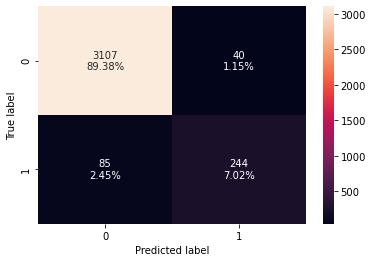

In [178]:
# creating confusion matrix
confusion_matrix_statsmodels(lg8, X8_train, y8_train)

In [179]:
log_reg_model_train_perf = model_performance_classification_statsmodels(
    lg8, X8_train, y8_train
)

print("Training performance:")
log_reg_model_train_perf

Training performance:


Accuracy    Recall  Precision        F1
0  0.964039  0.741641   0.859155  0.796085

# ROC-AUC on training set

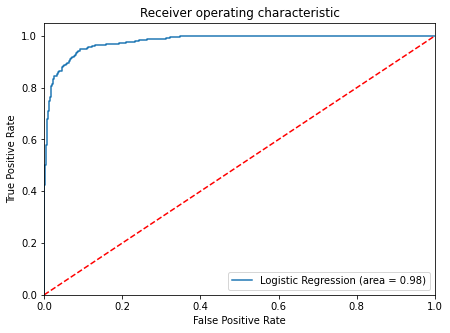

In [180]:
logit_roc_auc_train = roc_auc_score(y8_train, lg8.predict(X8_train))
fpr, tpr, thresholds = roc_curve(y_train, lg8.predict(X8_train))
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label="Logistic Regression (area = %0.2f)" % logit_roc_auc_train)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

In [181]:
# Optimal threshold as per AUC-ROC curve
# The optimal cut off would be where tpr is high and fpr is low
fpr, tpr, thresholds = roc_curve(y8_train, lg8.predict(X8_train))

optimal_idx = np.argmax(tpr - fpr)
optimal_threshold_auc_roc = thresholds[optimal_idx]
print(optimal_threshold_auc_roc)

0.09897176569299011


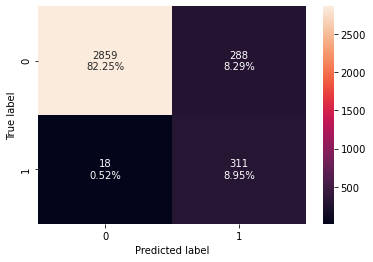

In [183]:
# creating confusion matrix
confusion_matrix_statsmodels(
    lg8, X8_train, y8_train, threshold=optimal_threshold_auc_roc
)

In [184]:
# checking model performance for this model
log_reg_model_train_perf_threshold_auc_roc = model_performance_classification_statsmodels(
    lg8, X8_train, y8_train, threshold=optimal_threshold_auc_roc
)
print("Training performance:")
log_reg_model_train_perf_threshold_auc_roc

Training performance:


Accuracy    Recall  Precision        F1
0  0.911968  0.945289   0.519199  0.670259

Recall has increased but the other metrics have become worse <br>
Model performance has gone down <br>

# Precision Recall curve (to see if there is a better threshold)

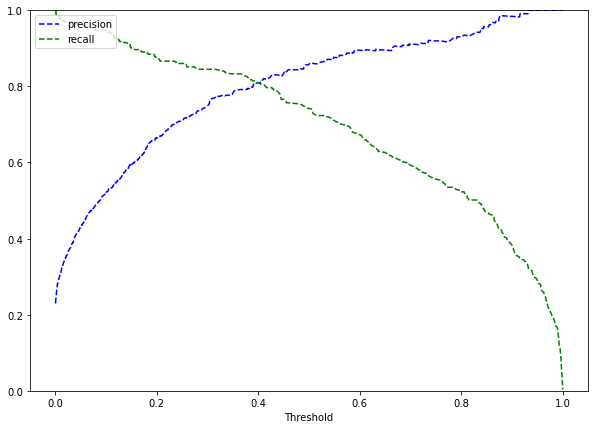

In [186]:
y_scores = lg8.predict(X8_train)
prec, rec, tre = precision_recall_curve(y8_train, y_scores,)


def plot_prec_recall_vs_tresh(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="precision")
    plt.plot(thresholds, recalls[:-1], "g--", label="recall")
    plt.xlabel("Threshold")
    plt.legend(loc="upper left")
    plt.ylim([0, 1])


plt.figure(figsize=(10, 7))
plot_prec_recall_vs_tresh(prec, rec, tre)
plt.show()

Balance of recall and precision at 0.42

In [187]:
# setting the threshold
optimal_threshold_curve = 0.42

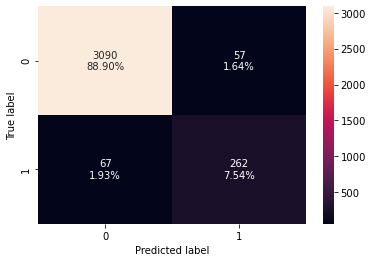

In [188]:
# creating confusion matrix with the new threshold
confusion_matrix_statsmodels(lg8, X8_train, y8_train, threshold=optimal_threshold_curve)

In [189]:
log_reg_model_train_perf_threshold_curve = model_performance_classification_statsmodels(
    lg8, X8_train, y8_train, threshold=optimal_threshold_curve
)
print("Training performance:")
log_reg_model_train_perf_threshold_curve

Training performance:


Accuracy    Recall  Precision        F1
0  0.964327  0.796353   0.821317  0.808642

Model is performing well

In [195]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        log_reg_model_train_perf.T,
        log_reg_model_train_perf_threshold_auc_roc.T,
        log_reg_model_train_perf_threshold_curve.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Logistic Regression sklearn",
    "Logistic Regression-0.09 Threshold",
    "Logistic Regression-0.42 Threshold",
]

print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


Logistic Regression sklearn  Logistic Regression-0.09 Threshold  \
Accuracy                      0.964039                            0.911968   
Recall                        0.741641                            0.945289   
Precision                     0.859155                            0.519199   
F1                            0.796085                            0.670259   

           Logistic Regression-0.42 Threshold  
Accuracy                             0.964327  
Recall                               0.796353  
Precision                            0.821317  
F1                                   0.808642

# Checking performance on Test set

In [196]:
X8_test = X8_test[list(X8_train.columns)]

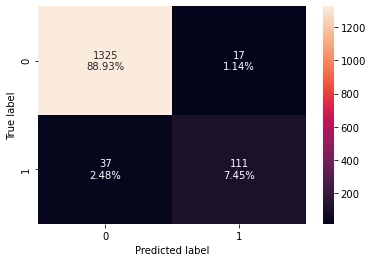

In [197]:
# creating confusion matrix

confusion_matrix_statsmodels(lg8, X8_test, y8_test)

In [198]:
log_reg_model_test_perf = model_performance_classification_statsmodels(
    lg8, X8_test, y8_test
)

print("Test performance:")
log_reg_model_test_perf

Test performance:


Accuracy  Recall  Precision        F1
0  0.963758    0.75   0.867188  0.804348

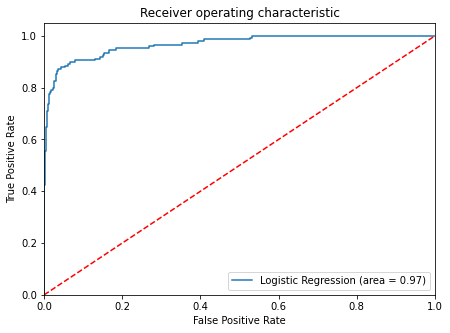

In [199]:
logit_roc_auc_train = roc_auc_score(y8_test, lg8.predict(X8_test))
fpr, tpr, thresholds = roc_curve(y_test, lg8.predict(X8_test))
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label="Logistic Regression (area = %0.2f)" % logit_roc_auc_train)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

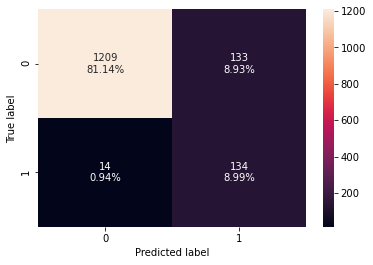

In [200]:
# creating confusion matrix

confusion_matrix_statsmodels(lg8, X8_test, y8_test, threshold=optimal_threshold_auc_roc)

In [201]:
# checking model performance for this model
log_reg_model_test_perf_threshold_auc_roc = model_performance_classification_statsmodels(
    lg8, X8_test, y8_test, threshold=optimal_threshold_auc_roc
)
print("Test performance:")
log_reg_model_test_perf_threshold_auc_roc

Test performance:


Accuracy    Recall  Precision        F1
0  0.901342  0.905405   0.501873  0.645783

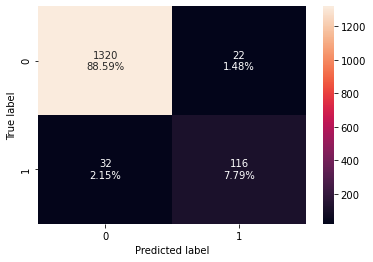

In [202]:
# creating confusion matrix

confusion_matrix_statsmodels(lg8, X8_test, y8_test, threshold=optimal_threshold_curve)

In [203]:
log_reg_model_test_perf_threshold_curve = model_performance_classification_statsmodels(
    lg8, X8_test, y8_test, threshold=optimal_threshold_curve
)
print("Test performance:")
log_reg_model_test_perf_threshold_curve

Test performance:


Accuracy    Recall  Precision        F1
0  0.963758  0.783784    0.84058  0.811189

# Model Performance Summary

In [204]:
# testing performance comparison

models_test_comp_df = pd.concat(
    [
        log_reg_model_test_perf.T,
        log_reg_model_test_perf_threshold_auc_roc.T,
        log_reg_model_test_perf_threshold_curve.T,
    ],
    axis=1,
)
models_test_comp_df.columns = [
    "Logistic Regression sklearn",
    "Logistic Regression-0.09 Threshold",
    "Logistic Regression-0.42 Threshold",
]

print("Test set performance comparison:")
models_test_comp_df

Test set performance comparison:


Logistic Regression sklearn  Logistic Regression-0.09 Threshold  \
Accuracy                      0.963758                            0.901342   
Recall                        0.750000                            0.905405   
Precision                     0.867188                            0.501873   
F1                            0.804348                            0.645783   

           Logistic Regression-0.42 Threshold  
Accuracy                             0.963758  
Recall                               0.783784  
Precision                            0.840580  
F1                                   0.811189

# Decision Tree Model

# Importing required packages

In [205]:
# Libraries to build decision tree classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# To tune different models
from sklearn.model_selection import GridSearchCV

# To get diferent metric scores
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    plot_confusion_matrix,
    make_scorer,
)

In [206]:
df.head()

ID  Age  Experience  Income  ZIPCode  Family  CCAvg  Education  Mortgage  \
0   1   25           1      49    91107       4    1.6          1         0   
1   2   45          19      34    90089       3    1.5          1         0   
2   3   39          15      11    94720       1    1.0          1         0   
3   4   35           9     100    94112       1    2.7          2         0   
4   5   35           8      45    91330       4    1.0          2         0   

   Personal_Loan  Securities_Account  CD_Account  Online  CreditCard  \
0              0                   1           0       0           0   
1              0                   1           0       0           0   
2              0                   0           0       0           0   
3              0                   0           0       0           0   
4              0                   0           0       0           1   

   Income_log           City                County  CCAvg_log  Mortgage_Bin  
0    3.891820       Pasadena    Los Angeles County   0.955511             0  
1    3.526361    Los Angeles    Los Angeles County   0.916291             0  
2    2.397895       Berkeley        Alameda County   0.693147             0  
3    4.605170  San Francisco  San Francisco County   1.308333             0  
4    3.806662     Northridge    Los Angeles County   0.693147             0

In [207]:
df1.head()

Age  Experience  Income  ZIPCode  Family  Education  Personal_Loan  \
0   25           1      49    91107       4          1              0   
1   45          19      34    90089       3          1              0   
2   39          15      11    94720       1          1              0   
3   35           9     100    94112       1          2              0   
4   35           8      45    91330       4          2              0   

   Securities_Account  CD_Account  Online  CreditCard  Income_log  \
0                   1           0       0           0    3.891820   
1                   1           0       0           0    3.526361   
2                   0           0       0           0    2.397895   
3                   0           0       0           0    4.605170   
4                   0           0       0           1    3.806662   

               County  CCAvg_log  Mortgage_Bin  
0  Los Angeles County   0.955511             0  
1  Los Angeles County   0.916291             0  
2      Alameda County   0.693147             0  
3               Other   1.308333             0  
4  Los Angeles County   0.693147             0

In [208]:
# Splitting data in train and test sets

X10 = df1.drop(['Personal_Loan'], axis=1)
Y10 = df1[['Personal_Loan']]

X10 = pd.get_dummies(X10, drop_first=True)

# X.head()
# X.tail()
# len(X.columns)

In [210]:
# Splitting data into training and test set:

X10_train, X10_test, y10_train, y10_test = train_test_split(X10, Y10, test_size=0.3, random_state=1)
print(X10_train.shape, X10_test.shape)

(3476, 17) (1490, 17)


In [211]:
print("Number of rows in train data =", X10_train.shape[0])
print("Number of rows in test data =", X10_test.shape[0])

Number of rows in train data = 3476
Number of rows in test data = 1490


In [212]:
print("Percentage of classes in training set:")
print(y10_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y10_test.value_counts(normalize=True))

Percentage of classes in training set:
Personal_Loan
0                0.905351
1                0.094649
dtype: float64
Percentage of classes in test set:
Personal_Loan
0                0.900671
1                0.099329
dtype: float64


# Defining fuctions to calculate f1_score and to create the confusion matrix

In [213]:
#  Function to calculate f1 score
def get_f1_score(model, predictors, target):
    """
    model: classifier
    predictors: independent variables
    target: dependent variable
    
    """
    prediction = model.predict(predictors)
    return f1_score(target, prediction)

In [214]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

In [215]:
# building the decision tree model

model = DecisionTreeClassifier(
    criterion="gini", class_weight={0: 0.15, 1: 0.85}, random_state=1
)

In [218]:
model.fit(X10_train, y10_train)

DecisionTreeClassifier(class_weight={0: 0.15, 1: 0.85}, random_state=1)

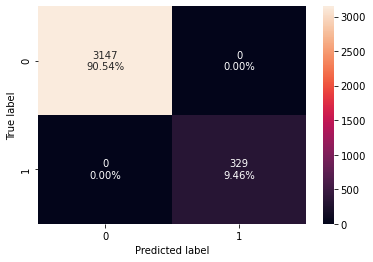

In [219]:
# Checking model performance on training set

confusion_matrix_sklearn(model, X10_train, y10_train)

In [223]:
decision_tree_perf_train = get_f1_score(model, X10_train, y10_train)

print("f1_score:", decision_tree_perf_train)

f1_score: 1.0


Model is able to perfectly classify all the data points on the training set. <br>
0 errors on the training set, each sample has been classified correctly. <br>

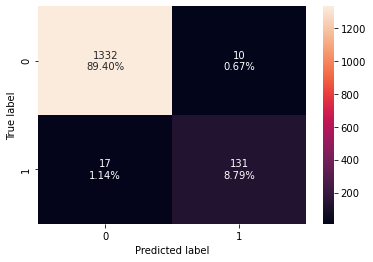

In [221]:
# Checking model performance on test set

confusion_matrix_sklearn(model, X10_test, y10_test)

In [224]:
decision_tree_perf_test = get_f1_score(model, X10_test, y10_test)
print("f1_score:", decision_tree_perf_test)

f1_score: 0.9065743944636678


Not a big disparity between the f1_score on test and training data.

# Viualizing the Decision Tree

In [225]:
# creating a list of column names

feature_names = X10_train.columns.to_list()

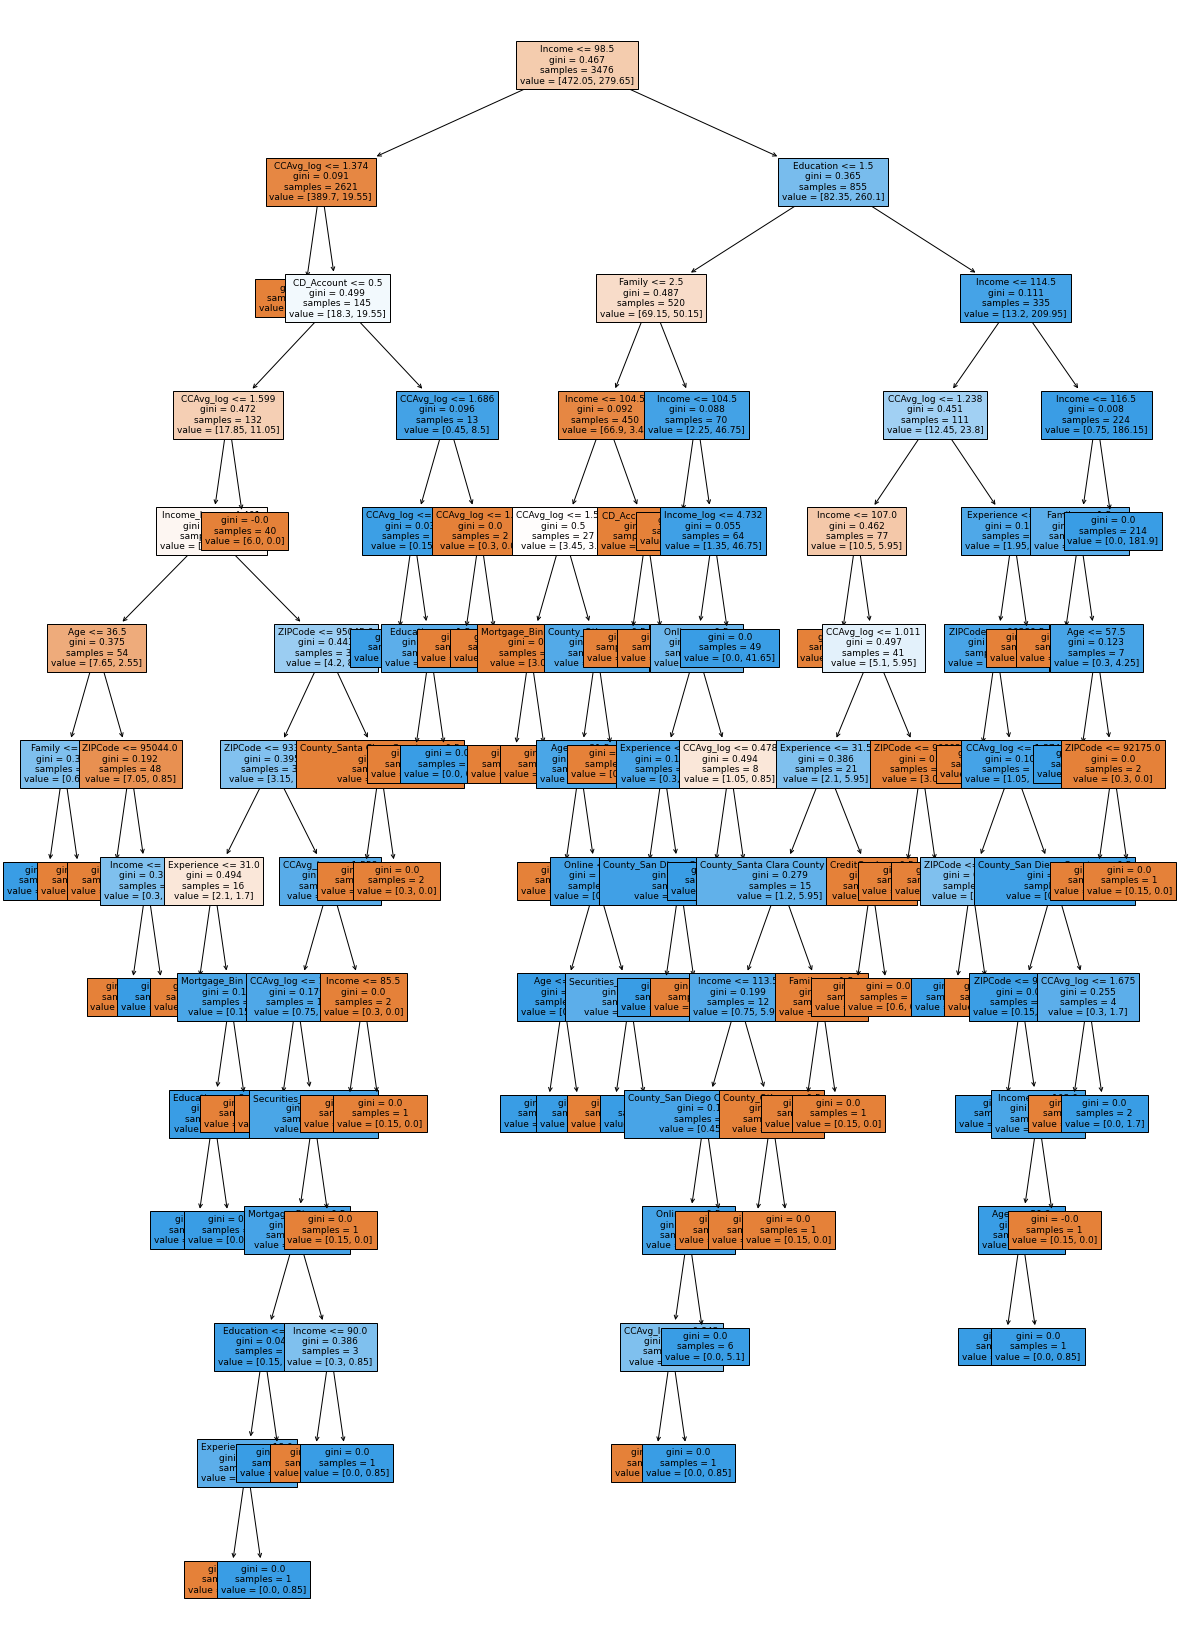

In [226]:
plt.figure(figsize=(20, 30))
out = tree.plot_tree(
    model,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
# below code will add arrows to the decision tree split if they are missing
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [227]:
# importance of features in the tree building

print(
    pd.DataFrame(
        model.feature_importances_, columns=["Imp"], index=X10_train.columns
    ).sort_values(by="Imp", ascending=False)
)

                                    Imp
Income                     5.825092e-01
Family                     1.394369e-01
Education                  1.207518e-01
CCAvg_log                  9.744724e-02
ZIPCode                    1.262038e-02
CD_Account                 1.252639e-02
Experience                 1.207718e-02
Income_log                 7.056159e-03
Age                        6.393073e-03
Online                     2.263537e-03
County_Santa Clara County  1.893683e-03
County_San Diego County    1.776559e-03
Securities_Account         1.462201e-03
Mortgage_Bin               1.092490e-03
County_Other               6.931518e-04
CreditCard                 1.507788e-17
County_Los Angeles County  0.000000e+00


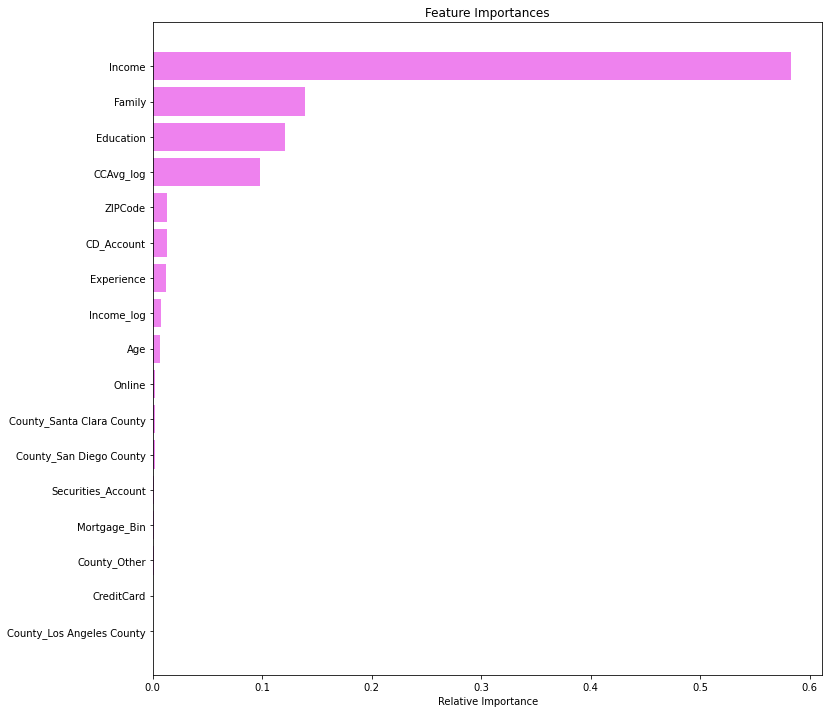

In [228]:
importances = model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

According to the decision tree model, Income is the most important feature for prediction

# Using GridSearch for Hyperparameter tuning of our tree model

In [229]:
# Choose the type of classifier.
estimator = DecisionTreeClassifier(random_state=1, class_weight={0: 0.15, 1: 0.85})

# Grid of parameters to choose from
parameters = {
    "max_depth": [5, 10, 15, None],
    "criterion": ["entropy", "gini"],
    "splitter": ["best", "random"],
    "min_impurity_decrease": [0.00001, 0.0001, 0.01],
}

# Type of scoring used to compare parameter combinations
scorer = make_scorer(recall_score)

# Run the grid search
grid_obj = GridSearchCV(estimator, parameters, scoring=scorer, cv=5)
grid_obj = grid_obj.fit(X10_train, y10_train)

# Set the clf to the best combination of parameters
estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data.
estimator.fit(X10_train, y10_train)

DecisionTreeClassifier(class_weight={0: 0.15, 1: 0.85}, max_depth=5,
                       min_impurity_decrease=0.01, random_state=1)

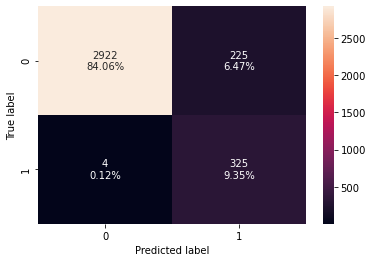

In [230]:
confusion_matrix_sklearn(estimator, X10_train, y10_train)

In [232]:
decision_tree_tune_perf_train = get_f1_score(estimator, X10_train, y10_train)
print("f1_score:", decision_tree_tune_perf_train)

f1_score: 0.739476678043231


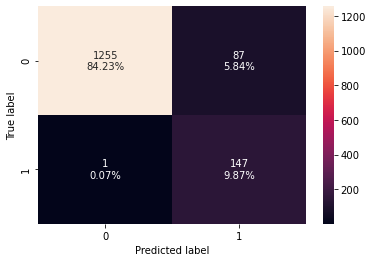

In [231]:
confusion_matrix_sklearn(estimator, X10_test, y10_test)

In [233]:
decision_tree_tune_perf_test = get_f1_score(estimator, X10_test, y10_test)
print("f1_score:", decision_tree_tune_perf_test)

f1_score: 0.769633507853403


The model is giving a more generalized result now

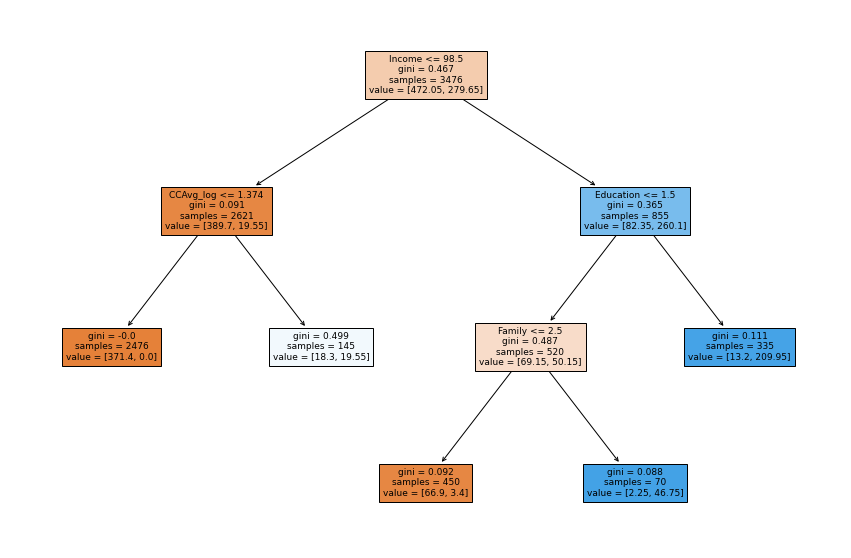

In [234]:
plt.figure(figsize=(15, 10))
out = tree.plot_tree(
    estimator,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [235]:
# Text report showing the rules of a decision tree -

print(tree.export_text(estimator, feature_names=feature_names, show_weights=True))

|--- Income <= 98.50
|   |--- CCAvg_log <= 1.37
|   |   |--- weights: [371.40, 0.00] class: 0
|   |--- CCAvg_log >  1.37
|   |   |--- weights: [18.30, 19.55] class: 1
|--- Income >  98.50
|   |--- Education <= 1.50
|   |   |--- Family <= 2.50
|   |   |   |--- weights: [66.90, 3.40] class: 0
|   |   |--- Family >  2.50
|   |   |   |--- weights: [2.25, 46.75] class: 1
|   |--- Education >  1.50
|   |   |--- weights: [13.20, 209.95] class: 1



# Observations from the tree

In [236]:
# importance of features in the tree building

print(
    pd.DataFrame(
        model.feature_importances_, columns=["Imp"], index=X10_train.columns
    ).sort_values(by="Imp", ascending=False)
)

                                    Imp
Income                     5.825092e-01
Family                     1.394369e-01
Education                  1.207518e-01
CCAvg_log                  9.744724e-02
ZIPCode                    1.262038e-02
CD_Account                 1.252639e-02
Experience                 1.207718e-02
Income_log                 7.056159e-03
Age                        6.393073e-03
Online                     2.263537e-03
County_Santa Clara County  1.893683e-03
County_San Diego County    1.776559e-03
Securities_Account         1.462201e-03
Mortgage_Bin               1.092490e-03
County_Other               6.931518e-04
CreditCard                 1.507788e-17
County_Los Angeles County  0.000000e+00


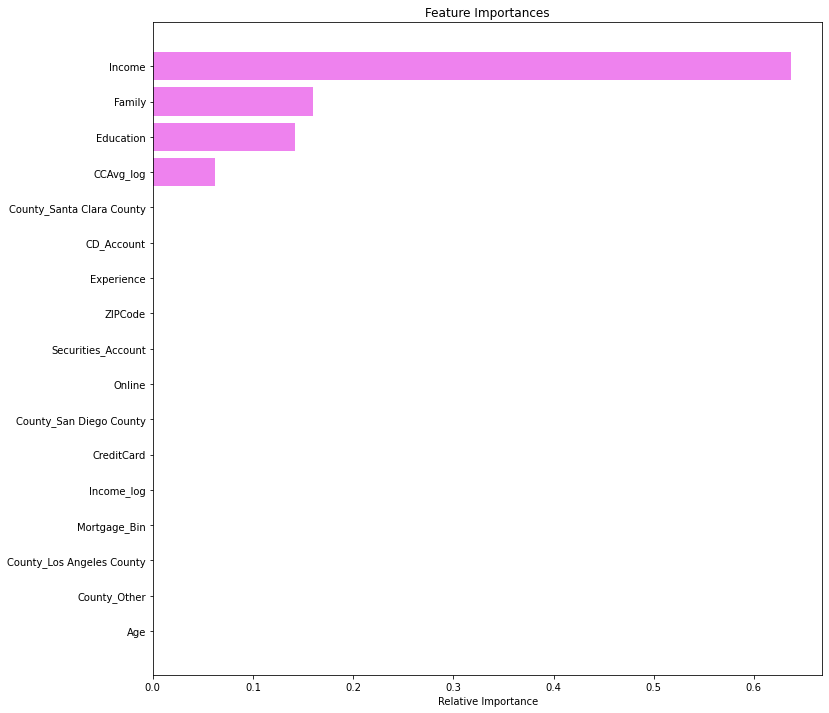

In [237]:
importances = estimator.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

Income is still the most important feature followed by Family

# Cost Complexity Pruning

In [238]:
clf = DecisionTreeClassifier(random_state=1, class_weight={0: 0.15, 1: 0.85})
path = clf.cost_complexity_pruning_path(X10_train, y10_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

In [239]:
pd.DataFrame(path)

ccp_alphas    impurities
0   0.000000e+00 -8.932510e-15
1   7.532443e-19 -8.931757e-15
2   7.532443e-19 -8.931004e-15
3   7.532443e-19 -8.930250e-15
4   1.772340e-18 -8.928478e-15
5   1.772340e-18 -8.926706e-15
6   1.772340e-18 -8.924933e-15
7   1.905265e-18 -8.923028e-15
8   2.924360e-18 -8.920104e-15
9   6.978587e-18 -8.913125e-15
10  7.045050e-18 -8.906080e-15
11  1.417872e-17 -8.891901e-15
12  1.506489e-17 -8.876836e-15
13  3.467361e-16 -8.530100e-15
14  1.911161e-04  3.822322e-04
15  1.946408e-04  7.715138e-04
16  1.960873e-04  1.163688e-03
17  1.974975e-04  1.558684e-03
18  3.375557e-04  2.233795e-03
19  3.519923e-04  3.641764e-03
20  3.667363e-04  4.008500e-03
21  3.710340e-04  5.121602e-03
22  3.727814e-04  5.867165e-03
23  3.849173e-04  6.637000e-03
24  5.899671e-04  7.226967e-03
25  6.227417e-04  7.849708e-03
26  6.590007e-04  8.508709e-03
27  6.624898e-04  1.049618e-02
28  7.248254e-04  1.267065e-02
29  7.449128e-04  1.341557e-02
30  8.848121e-04  1.430038e-02
31  9.151616e-04  1.704586e-02
32  1.179934e-03  1.822580e-02
33  1.337971e-03  1.956377e-02
34  1.428243e-03  2.099201e-02
35  1.472855e-03  2.246487e-02
36  1.564127e-03  2.715725e-02
37  1.890322e-03  2.904757e-02
38  2.220496e-03  3.126807e-02
39  2.645974e-03  3.391404e-02
40  2.945289e-03  3.685933e-02
41  2.987493e-03  4.283432e-02
42  3.498753e-03  4.633307e-02
43  4.052556e-03  5.038562e-02
44  5.852881e-03  5.623851e-02
45  6.966189e-03  6.320469e-02
46  9.307225e-03  7.251192e-02
47  2.438183e-02  9.689375e-02
48  5.952590e-02  2.159455e-01
49  2.512984e-01  4.672440e-01

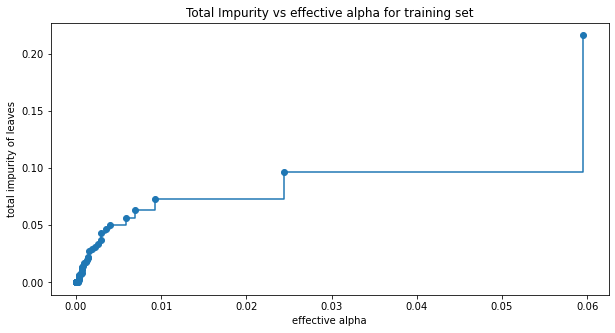

In [240]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")
plt.show()

In [241]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(
        random_state=1, ccp_alpha=ccp_alpha, class_weight={0: 0.15, 1: 0.85}
    )
    clf.fit(X10_train, y10_train)
    clfs.append(clf)
print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)

Number of nodes in the last tree is: 1 with ccp_alpha: 0.251298439842093


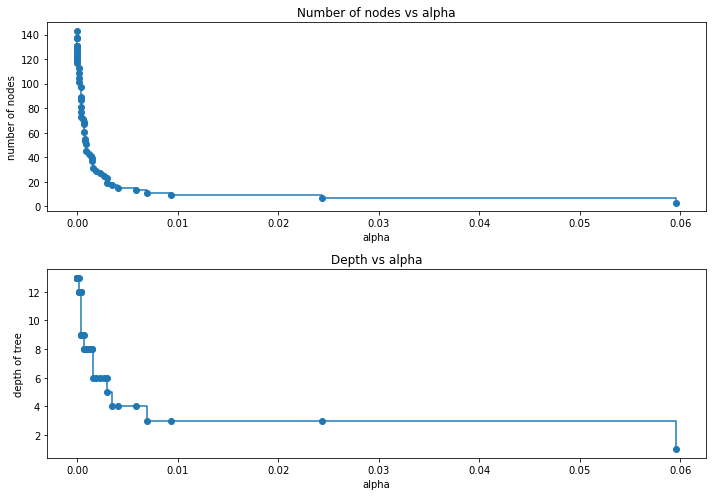

In [242]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1, figsize=(10, 7))
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

In [244]:
f1_train = []
for clf in clfs:
    pred_train = clf.predict(X10_train)
    values_train = f1_score(y10_train, pred_train)
    f1_train.append(values_train)

In [245]:
f1_test = []
for clf in clfs:
    pred_test = clf.predict(X10_test)
    values_test = f1_score(y10_test, pred_test)
    f1_test.append(values_test)

In [246]:
train_scores = [clf.score(X10_train, y10_train) for clf in clfs]
test_scores = [clf.score(X10_test, y10_test) for clf in clfs]

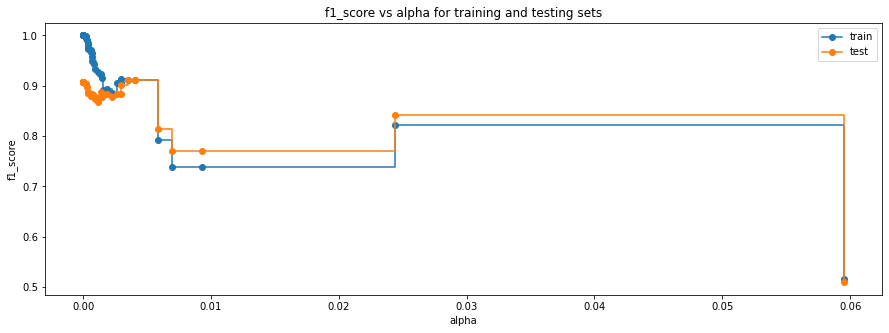

In [247]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.set_xlabel("alpha")
ax.set_ylabel("f1_score")
ax.set_title("f1_score vs alpha for training and testing sets")
ax.plot(
    ccp_alphas, f1_train, marker="o", label="train", drawstyle="steps-post",
)
ax.plot(ccp_alphas, f1_test, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

alpha = 0.005

In [248]:
# creating the model where we get highest train and test f1_score

index_best_model = np.argmax(f1_test)
best_model = clfs[index_best_model]
print(best_model)

DecisionTreeClassifier(ccp_alpha=0.0034987525920488387,
                       class_weight={0: 0.15, 1: 0.85}, random_state=1)


In [249]:
best_model.fit(X10_train, y10_train)

DecisionTreeClassifier(ccp_alpha=0.0034987525920488387,
                       class_weight={0: 0.15, 1: 0.85}, random_state=1)

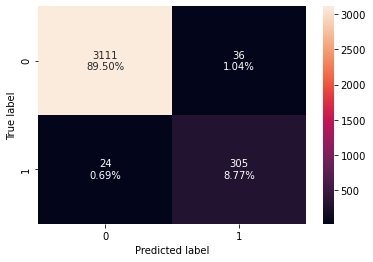

In [250]:
# checking performance on training data

confusion_matrix_sklearn(best_model, X10_train, y10_train)

In [251]:
print("f1_score:", get_f1_score(best_model, X10_train, y10_train))

f1_score: 0.9104477611940299


In [259]:
decision_tree_postpruned_perf_train = get_f1_score(best_model, X10_train, y10_train)
print("f1_score:", decision_tree_postpruned_perf_train)

f1_score: 0.9104477611940299


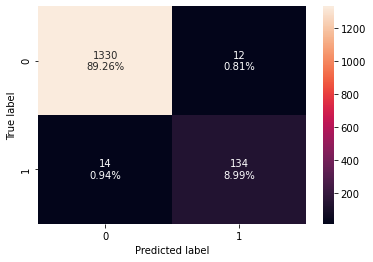

In [252]:
# checking performance on testing data

confusion_matrix_sklearn(best_model, X10_test, y10_test)

In [253]:
print("f1_score:", get_f1_score(best_model, X10_test, y10_test))

f1_score: 0.9115646258503401


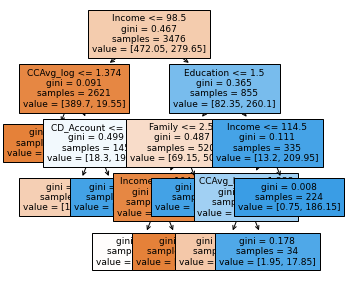

In [254]:
plt.figure(figsize=(5, 5))

out = tree.plot_tree(
    best_model,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [255]:
# Text report showing the rules of a decision tree -

print(tree.export_text(best_model, feature_names=feature_names, show_weights=True))

|--- Income <= 98.50
|   |--- CCAvg_log <= 1.37
|   |   |--- weights: [371.40, 0.00] class: 0
|   |--- CCAvg_log >  1.37
|   |   |--- CD_Account <= 0.50
|   |   |   |--- weights: [17.85, 11.05] class: 0
|   |   |--- CD_Account >  0.50
|   |   |   |--- weights: [0.45, 8.50] class: 1
|--- Income >  98.50
|   |--- Education <= 1.50
|   |   |--- Family <= 2.50
|   |   |   |--- Income <= 104.50
|   |   |   |   |--- weights: [3.45, 3.40] class: 0
|   |   |   |--- Income >  104.50
|   |   |   |   |--- weights: [63.45, 0.00] class: 0
|   |   |--- Family >  2.50
|   |   |   |--- weights: [2.25, 46.75] class: 1
|   |--- Education >  1.50
|   |   |--- Income <= 114.50
|   |   |   |--- CCAvg_log <= 1.24
|   |   |   |   |--- weights: [10.50, 5.95] class: 0
|   |   |   |--- CCAvg_log >  1.24
|   |   |   |   |--- weights: [1.95, 17.85] class: 1
|   |   |--- Income >  114.50
|   |   |   |--- weights: [0.75, 186.15] class: 1



In [257]:
decision_tree_postpruned_perf_test = get_f1_score(best_model, X10_test, y10_test)
print("f1_score:", decision_tree_postpruned_perf_test)

f1_score: 0.9115646258503401


In [260]:
# training performance comparison

models_train_comp_df = pd.DataFrame(
    [
        decision_tree_perf_train,
        decision_tree_tune_perf_train,
        decision_tree_postpruned_perf_train,
    ],
    columns=["f1 on training set"],
)

print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


f1 on training set
0            1.000000
1            0.739477
2            0.910448

In [261]:
# testing performance comparison

models_test_comp_df = pd.DataFrame(
    [
        decision_tree_perf_test,
        decision_tree_tune_perf_test,
        decision_tree_postpruned_perf_test,
    ],
    columns=["Recall on testing set"],
)

print("Test performance comparison:")
models_test_comp_df

Test performance comparison:


Recall on testing set
0               0.906574
1               0.769634
2               0.911565